#### Resumen


*  **Dataset**: imput_media_moda
*  Usé el método ***undersampling*** para el conjunto de entrenamiento porque la distribución de la variable objetiva no está balanceada.

*   Transformé la variable ***FacturaTotal*** a ***FacturaTotal_log***.
*  **Modelo final**:

    *form5 = 'Fuga ~ Contrato + Int_serv + FacturaTotal_log + Fact_sinPapel + Soporte_tecnico + Seguridad + Mayor65 + TV_streaming + Peliculas'*


*  **Resultados**:

---



    Pseudo R-squared (modelo 5): 0.3037

    ROC curve: 0.86

    Corte (threshold): 0.5

    Accuracy: 0.75

    Precision clase 0: 0.91, Recall clase 0: 0.72, F1-score clase 0: 0.81

    Precision clase 1: 0.51, Recall clase 1: 0.81, F1-score clase 1: 0.63

    F1-score promedio ponderado: 0.76

    Pseudo R-squared (modelo final ajustado a datos completos): 0.2873


In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

 Una compañía telefónica nos ha concedido un proyecto para predecir la fuga de sus
clientes antes de que ocurra, de forma que puedan llevar a cabo acciones para la
retención de estos clientes en riesgo de abandono.
OBJETIVO:
 ajustar el mejor modelo de predicción para esta
variable objetivo binaria en los datos de training.

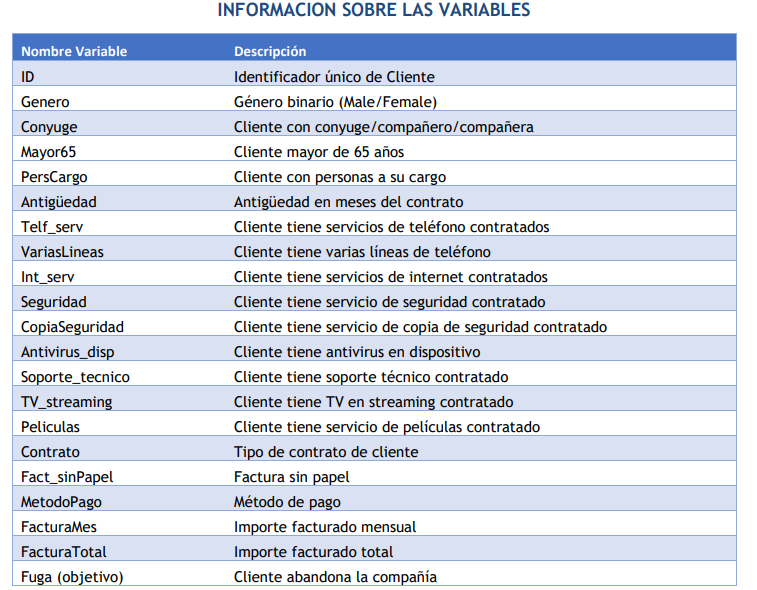

In [ ]:
#Lectura en colab, que no puede acceder al equipo
from google.colab import drive
import os

drive.mount('/content/drive')

mi_directorio = '/content/drive/My Drive/Mineria de datos/'
os.chdir(mi_directorio)

fuga = pd.read_csv(
    r'FugaClientes_Training.csv'
    )
fuga.head(10)
fuga.tail(10)

Mounted at /content/drive


,ID,Genero,Mayor65,Conyuge,PersCargo,Antig.fc.edad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,Fuga
6343,6894-LFHLY,Male,1.0,No,No,1.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,NaN,75.75,75.75,1
6344,9767-FFLEM,Male,NaN,No,No,38.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0
6345,0639-TSIQW,Female,0.0,No,No,67.0,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1
6346,8456-QDAVC,Male,0.0,No,No,19.0,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,NaN,Bank transfer (automatic),NaN,1495.10,0
6347,7750-EYXWZ,Female,0.0,No,No,12.0,No,No,DSL,No,...,Yes,Yes,Yes,Yes,NaN,No,Electronic check,60.65,743.30,0
6348,2569-WGERO,Female,0.0,No,No,72.0,Yes,No,No,No,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
6349,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
6350,2234-XADUH,NaN,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
6351,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,NaN,Yes,Mailed check,74.40,306.60,1
6352,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,NaN,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [ ]:
# Lectura de datos si estan en jupyther, poner la ruta de donde esté
#fuga = pd.read_csv(r'C:\Users\fbono\Desktop\Mineria_de_datos\Tarea_Minería_2024_25\FugaClientes_Training.csv')
#fuga.head()

In [ ]:
fuga = fuga.rename(columns=lambda x: x.replace('.', '_'))
##agregue este punto por que al tirar la regresion, la columna antiguedad.fc tiene errores, por tener el ".". Lo cambio por "_"
fuga

,ID,Genero,Mayor65,Conyuge,PersCargo,Antig_fc_edad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,Fuga
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,NaN,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,NaN,0.0,No,No,45.0,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,NaN,42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,2569-WGERO,Female,0.0,No,No,72.0,Yes,No,No,No,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
6349,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
6350,2234-XADUH,NaN,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
6351,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,NaN,Yes,Mailed check,74.40,306.60,1


In [ ]:
#Chequeo tipo de variables varios nules.
#fuga.set_index('ID', inplace=True)
fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6353 non-null   object 
 1   Genero           6001 non-null   object 
 2   Mayor65          6001 non-null   float64
 3   Conyuge          6353 non-null   object 
 4   PersCargo        6353 non-null   object 
 5   Antig_fc_edad    5959 non-null   float64
 6   Telf_serv        6261 non-null   object 
 7   VariasLineas     6353 non-null   object 
 8   Int_serv         6163 non-null   object 
 9   Seguridad        6353 non-null   object 
 10  CopiaSeguridad   6353 non-null   object 
 11  Antivirus_disp   6353 non-null   object 
 12  Soporte_tecnico  6353 non-null   object 
 13  TV_streaming     6353 non-null   object 
 14  Peliculas        6353 non-null   object 
 15  Contrato         5959 non-null   object 
 16  Fact_sinPapel    6092 non-null   object 
 17  MetodoPago    

In [ ]:
##identificar posibles categorias y cantidad de grupos dentro de cada una
fuga.nunique()


,0
ID,6353
Genero,2
Mayor65,2
Conyuge,2
PersCargo,2
Antig_fc_edad,73
Telf_serv,2
VariasLineas,2
Int_serv,3
Seguridad,2


Las categoricas todas parecen tener números coherentes (<10 valores por categoria). Revisaria la antiguedad del contrato que es la que tiene 73, y ver de dejarla como continua o como grupos de antiguedades

In [ ]:
##cambio tipo de objeto a todas las categoricas
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(fuga.loc[:,fuga.nunique() <= 10]);

# Podemos cambiar el tipo de todas ellas a factor de una vez
fuga[to_factor] = fuga[to_factor].astype('category')

In [ ]:
fuga.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               6353 non-null   object  
 1   Genero           6001 non-null   category
 2   Mayor65          6001 non-null   category
 3   Conyuge          6353 non-null   category
 4   PersCargo        6353 non-null   category
 5   Antig_fc_edad    5959 non-null   float64 
 6   Telf_serv        6261 non-null   category
 7   VariasLineas     6353 non-null   category
 8   Int_serv         6163 non-null   category
 9   Seguridad        6353 non-null   category
 10  CopiaSeguridad   6353 non-null   category
 11  Antivirus_disp   6353 non-null   category
 12  Soporte_tecnico  6353 non-null   category
 13  TV_streaming     6353 non-null   category
 14  Peliculas        6353 non-null   category
 15  Contrato         5959 non-null   category
 16  Fact_sinPapel    6092 non-null   category


In [ ]:
fuga.describe().round(1)


,Antig_fc_edad,FacturaMes,FacturaTotal
count,5959.0,5959.0,6342.0
mean,32.4,64.7,2268.7
std,24.5,30.0,2258.8
min,0.0,18.2,18.8
25%,9.0,35.6,394.5
50%,29.0,70.3,1384.2
75%,55.0,89.8,3781.5
max,72.0,118.8,8672.4


In [ ]:
fuga.describe(exclude=np.number)


,ID,Genero,Mayor65,Conyuge,PersCargo,Telf_serv,VariasLineas,Int_serv,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga
count,6353,6001,6001.0,6353,6353,6261,6353,6163,6353,6353,6353,6353,6353,6353,5959,6092,5881,6353
unique,6353,2,2.0,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,3186-AJIEK,Male,0.0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
freq,1,3038,5045.0,3287,4439,5656,3687,2702,4532,4180,4180,4509,3936,3902,3285,3609,1972,4667


Cat


Cat


Cat


Cat


Cont


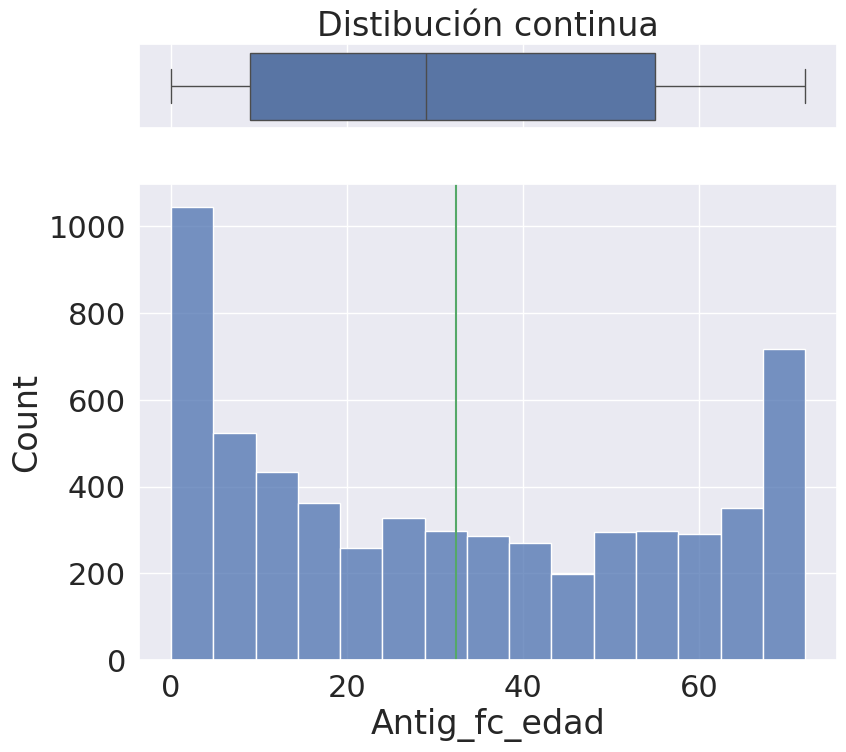

Cat


Cat


Cat


Cat


Cat


Cat


Cat


Cat


Cat


Cat


Cat


Cat


Cont


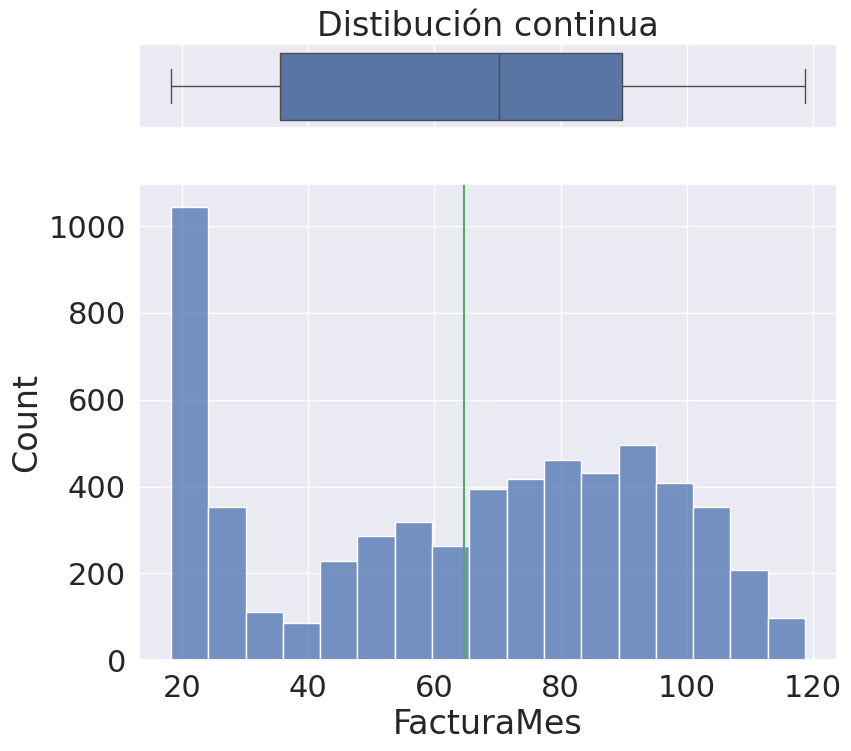

Cont


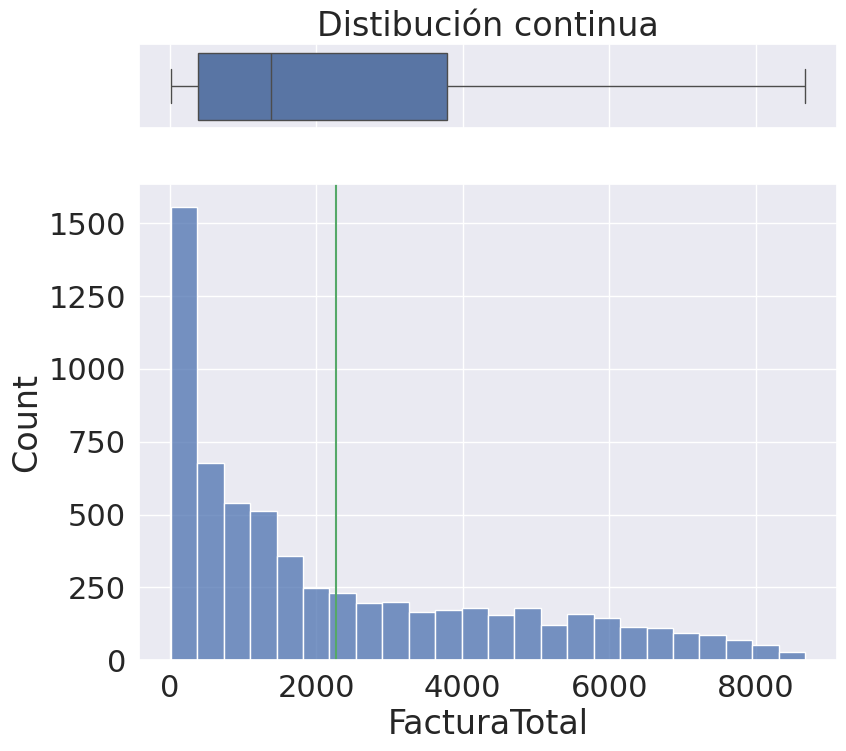

Cat


,0
Genero,None
Mayor65,None
Conyuge,None
PersCargo,None
Antig_fc_edad,None
Telf_serv,None
VariasLineas,None
Int_serv,None
Seguridad,None
CopiaSeguridad,None


In [ ]:
exec(open("NuestrasFunciones.py").read())

def plot(col):
     if col.dtypes != 'category':
        print('Cont')
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        print('Cat')
        cat_plot(col).show()

# Aplicar a una serie de columas 1:9 del data
fuga.drop(columns=["ID"]).apply(plot)


In [ ]:
fuga['FacturaTotal_log'] = np.log(fuga['FacturaTotal'])

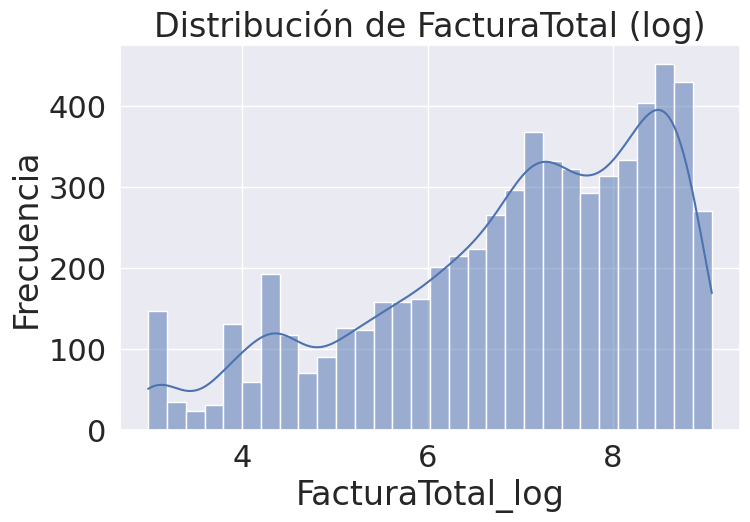

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(fuga['FacturaTotal_log'], bins=30, kde=True)
plt.title("Distribución de FacturaTotal (log)")
plt.xlabel("FacturaTotal_log")
plt.ylabel("Frecuencia")
plt.show()

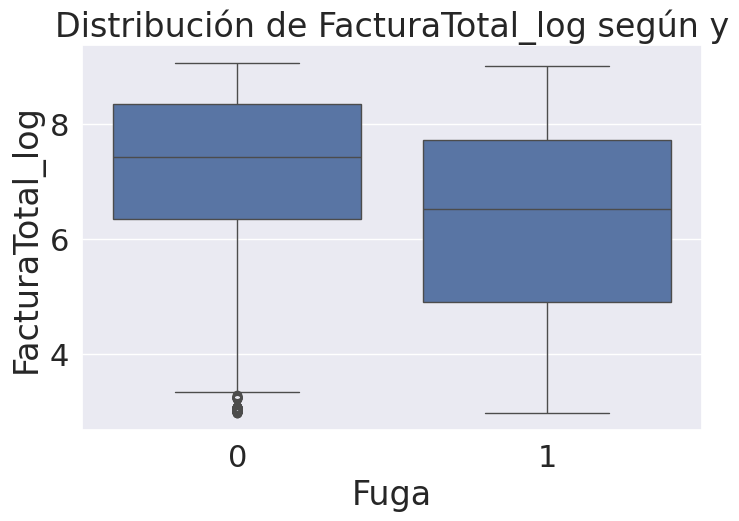

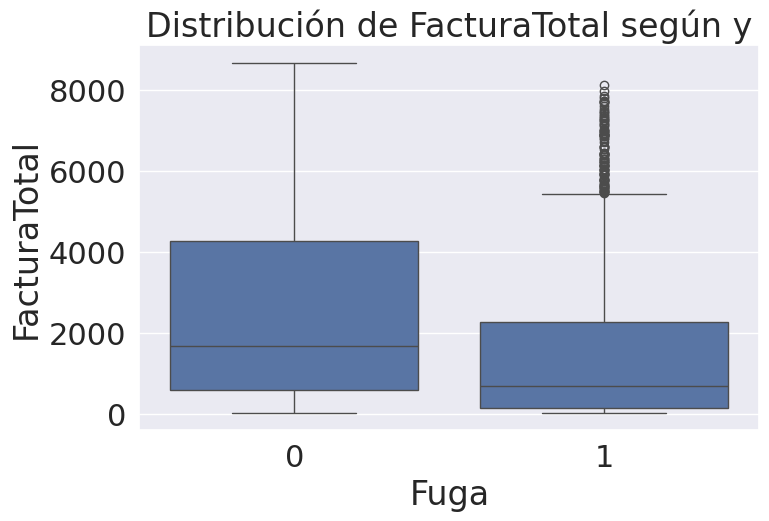

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=fuga, x='Fuga', y='FacturaTotal_log')
plt.title('Distribución de FacturaTotal_log según y')
plt.xlabel('Fuga')
plt.ylabel('FacturaTotal_log')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=fuga, x='Fuga', y='FacturaTotal')
plt.title('Distribución de FacturaTotal según y')
plt.xlabel('Fuga')
plt.ylabel('FacturaTotal')
plt.show()

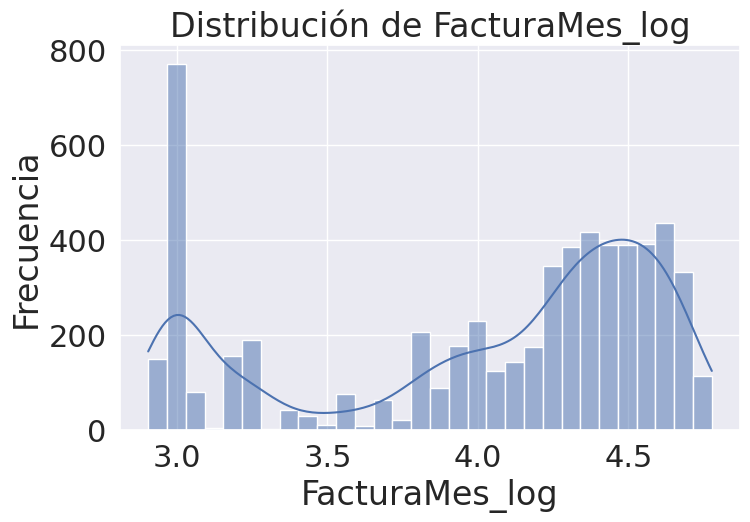

In [ ]:
fuga['FacturaMes_log'] = np.log(fuga['FacturaMes'])

plt.figure(figsize=(8,5))
sns.histplot(fuga['FacturaMes_log'], bins=30, kde=True)
plt.title("Distribución de FacturaMes_log")
plt.xlabel("FacturaMes_log")
plt.ylabel("Frecuencia")
plt.show()




In [ ]:
fuga = fuga.drop(columns=['FacturaMes_log'])

# Analisis outliers

In [ ]:
#ya en las distribuciones, no se ven atipicos, tampoco en skew (todo menor a 1, en factura quizas)
fuga.select_dtypes(include=np.number).skew()

,0
Antig_fc_edad,0.240505
FacturaMes,-0.219667
FacturaTotal,0.967912
FacturaTotal_log,-0.737213


In [ ]:
#funcion para gestionar outliers, pero no hay
fuga.select_dtypes(include=np.number).apply(lambda x: gestiona_outliers(x))

Antig_fc_edad
FacturaMes
FacturaTotal
FacturaTotal_log


,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


VALORES NULOS


In [ ]:

varObjBin = fuga.Fuga
imput = fuga.drop(['Fuga'],axis=1)

imput.head()

,ID,Genero,Mayor65,Conyuge,PersCargo,Antig_fc_edad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,FacturaTotal_log
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,NaN,29.85,3.429137
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.50,7.544597
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,4.692723
3,7795-CFOCW,NaN,0.0,No,No,45.0,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,NaN,42.30,1840.75,7.518471
4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,5.028148


In [ ]:
imput.apply(lambda x: x.isna().sum()/fuga.shape[0]*100)


,0
ID,0.000000
Genero,5.540689
Mayor65,5.540689
Conyuge,0.000000
PersCargo,0.000000
Antig_fc_edad,6.201794
Telf_serv,1.448135
VariasLineas,0.000000
Int_serv,2.990713
Seguridad,0.000000


In [ ]:
#Proporción de missings por observación (como una nueva columna del dataset)
imput['prop_missings'] = imput.apply(lambda x: x.isna().sum()/imput.shape[1]*100,axis=1)

# Valoramos distribución
imput.prop_missings.describe()


,prop_missings
count,6353.000000
mean,2.190941
std,3.092016
min,0.000000
25%,0.000000
50%,0.000000
75%,4.761905
max,19.047619


In [ ]:
imput.sort_values(by='prop_missings', ascending=False).head()

,ID,Genero,Mayor65,Conyuge,PersCargo,Antig_fc_edad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings
3447,3213-VVOLG,Male,NaN,Yes,Yes,NaN,Yes,Yes,No,No,...,No,No,No,Two year,No,Mailed check,25.35,NaN,NaN,19.047619
4712,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No,...,No,No,No,NaN,Yes,Mailed check,19.70,NaN,NaN,14.285714
5452,1871-MOWRM,Male,0.0,Yes,No,NaN,Yes,No,NaN,Yes,...,Yes,No,No,Month-to-month,NaN,Bank transfer (automatic),80.85,866.45,6.765558,14.285714
1446,3068-OMWZA,Male,NaN,No,No,1.0,Yes,Yes,NaN,No,...,No,Yes,No,NaN,Yes,Electronic check,88.80,88.80,4.497585,14.285714
2691,4674-HGNUA,Male,0.0,Yes,Yes,NaN,Yes,Yes,NaN,Yes,...,Yes,Yes,Yes,Two year,No,NaN,89.90,6457.15,8.773098,14.285714


<Axes: >

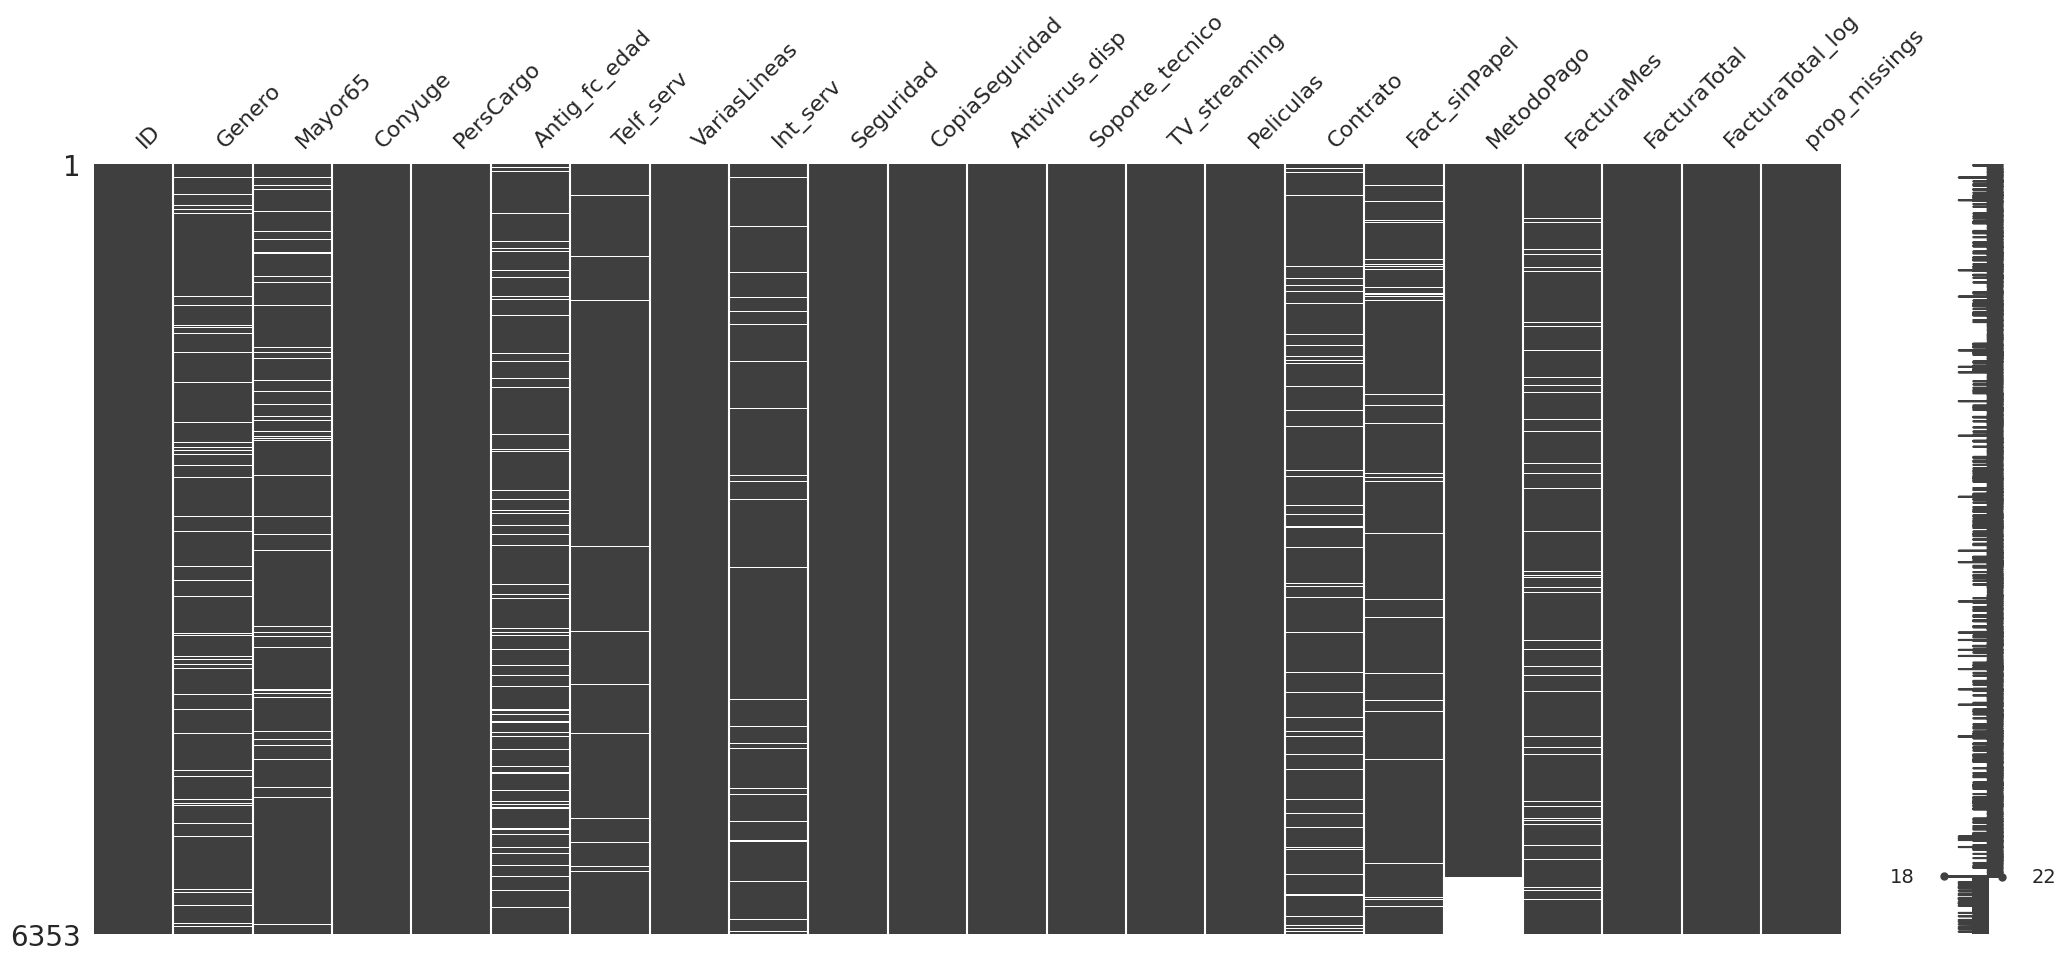

In [ ]:
#!pip install missingno
import missingno as msno

# Plot correlation heatmap of missingness
msno.matrix(imput.sort_values(by='MetodoPago'))


<Axes: >

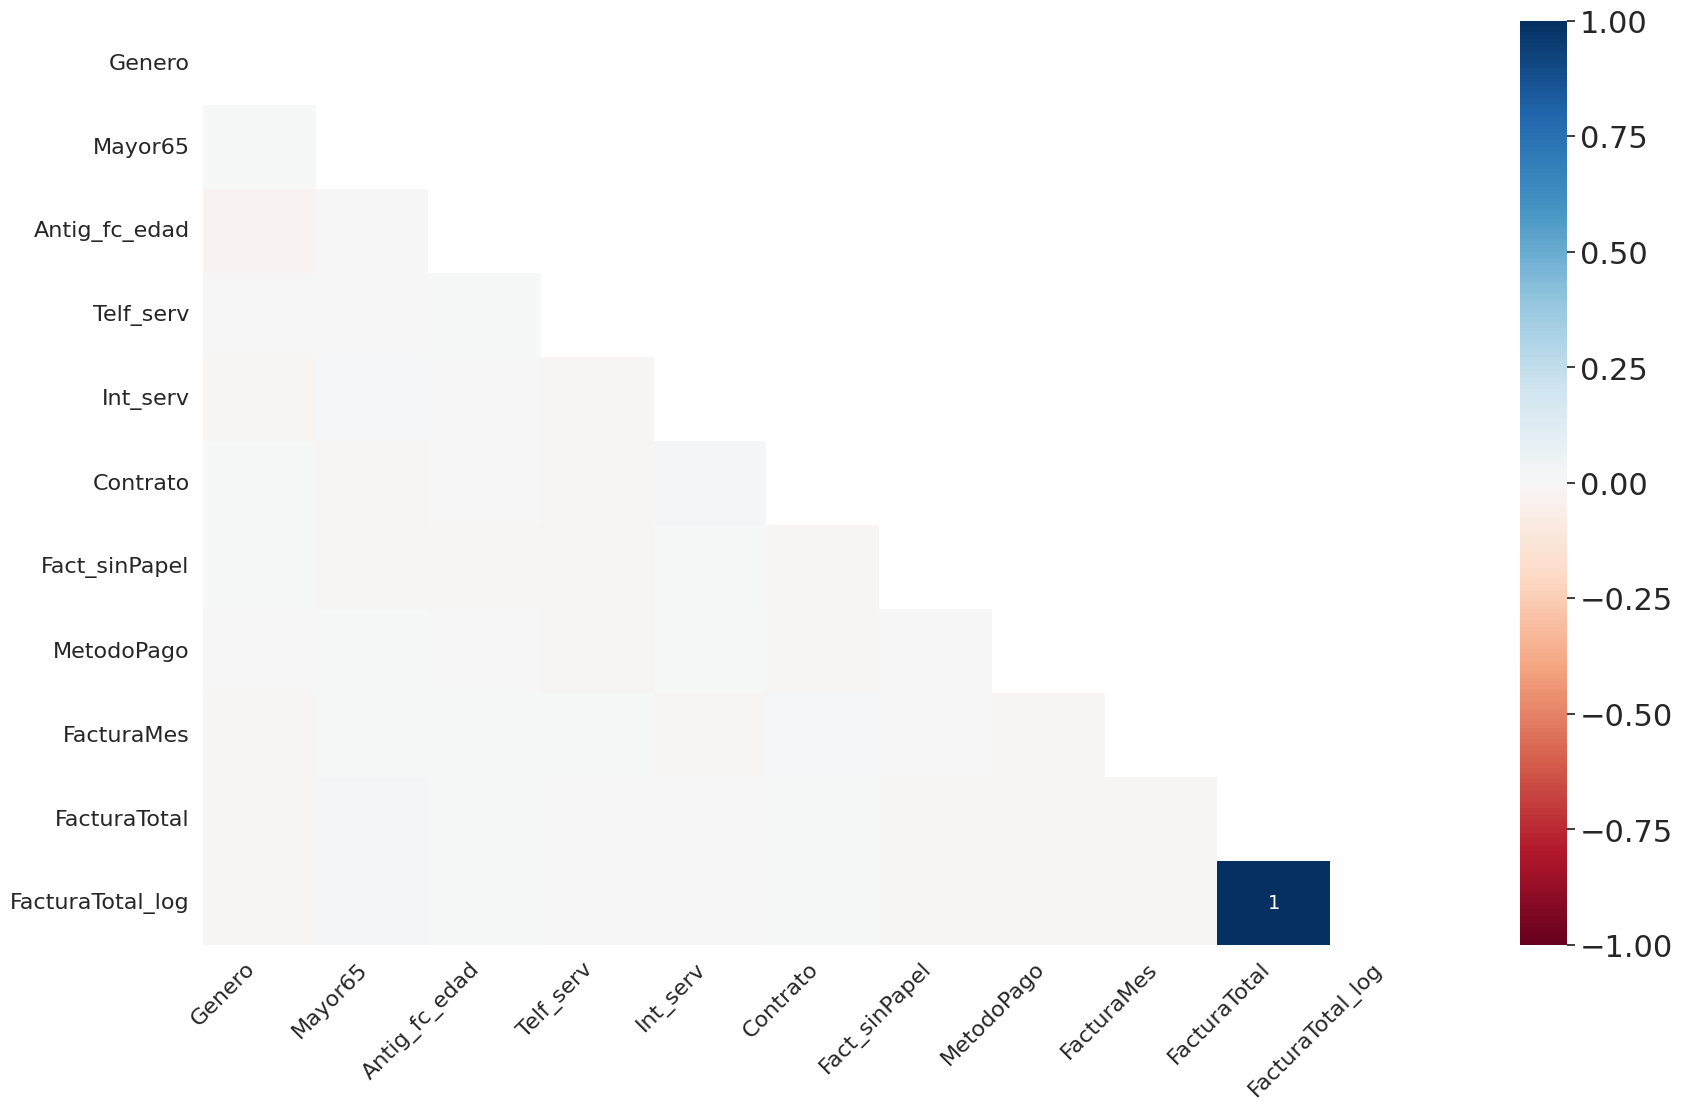

In [ ]:

#realaciones entre valores nulos de las variables, ninguna muestra correlacion
msno.heatmap(imput)



```
Que decisión tomar para los nulos
```



In [ ]:
##dropear
imput.dropna().info()
##no, nos quedan 3927 de 6353

<class 'pandas.core.frame.DataFrame'>
Index: 3927 entries, 2 to 6349
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                3927 non-null   object  
 1   Genero            3927 non-null   category
 2   Mayor65           3927 non-null   category
 3   Conyuge           3927 non-null   category
 4   PersCargo         3927 non-null   category
 5   Antig_fc_edad     3927 non-null   float64 
 6   Telf_serv         3927 non-null   category
 7   VariasLineas      3927 non-null   category
 8   Int_serv          3927 non-null   category
 9   Seguridad         3927 non-null   category
 10  CopiaSeguridad    3927 non-null   category
 11  Antivirus_disp    3927 non-null   category
 12  Soporte_tecnico   3927 non-null   category
 13  TV_streaming      3927 non-null   category
 14  Peliculas         3927 non-null   category
 15  Contrato          3927 non-null   category
 16  Fact_sinPapel     3927 non-nu

Se perderían el 61,85% de los datos (al eliminar los NaNs)

##Imputacion

In [ ]:
imput_cont = imput.select_dtypes(include=np.number)
imput_cat = imput.select_dtypes(exclude=np.number)
imput_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               6353 non-null   object  
 1   Genero           6001 non-null   category
 2   Mayor65          6001 non-null   category
 3   Conyuge          6353 non-null   category
 4   PersCargo        6353 non-null   category
 5   Telf_serv        6261 non-null   category
 6   VariasLineas     6353 non-null   category
 7   Int_serv         6163 non-null   category
 8   Seguridad        6353 non-null   category
 9   CopiaSeguridad   6353 non-null   category
 10  Antivirus_disp   6353 non-null   category
 11  Soporte_tecnico  6353 non-null   category
 12  TV_streaming     6353 non-null   category
 13  Peliculas        6353 non-null   category
 14  Contrato         5959 non-null   category
 15  Fact_sinPapel    6092 non-null   category
 16  MetodoPago       5881 non-null   category


In [ ]:
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer
!pip install feature-engine

# Moda: Solo nominales
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# knn: Solo numéricas
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)

# Chain equations: solo numéricas
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

#conda install feature_engine
import feature_engine.imputation as fe_imp

# Aleatoria: numéricas y nominales
imputer_rand = fe_imp.RandomSampleImputer()

# Mediana: solo numéricas
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')

# Media: solo numericas
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
#Media
imput_mean_imputed = imputer_mean.fit_transform(imput_cont)#.transform(fuga_cont)
print(imput_mean_imputed.describe())
print(imput.describe())

# Mediana
imput_median_imputed = imputer_median.fit(imput_cont).transform(imput_cont)
print(imput_median_imputed.describe())


# knn y intimputed

imputer_knn.fit_transform(imput_cont)

imput_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(imput_cont),columns=imput_cont.columns)

##este no me dejo:
##imput_itImp_imputed = pd.DataFrame(imputer_itImp.fit_transform(imput_cont),columns=imput_cont.columns)
imput_knn_imputed.describe()
##imput_itImp_imputed.describe()


##Todos tienen medias muy parecidas

       Antig_fc_edad   FacturaMes  FacturaTotal  FacturaTotal_log  \
count    6353.000000  6353.000000   6353.000000       6353.000000   
mean       32.380769    64.678369   2268.727152          6.933244   
std        23.767136    29.067690   2256.886313          1.548210   
min         0.000000    18.250000     18.800000          2.985682   
25%        10.000000    41.100000    396.300000          5.984692   
50%        32.000000    68.750000   1387.350000          7.230853   
75%        54.000000    89.000000   3778.000000          8.237215   
max        72.000000   118.750000   8672.450000          9.068022   

       prop_missings  
count    6353.000000  
mean        2.190941  
std         3.092016  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         4.761905  
max        19.047619  
       Antig_fc_edad   FacturaMes  FacturaTotal  FacturaTotal_log  \
count    5959.000000  5959.000000   6342.000000       6342.000000   
mean       32.380769    64.678369

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings
count,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000
mean,31.739441,64.584246,2267.463912,6.932665,2.190941
std,24.469606,29.826203,2257.598373,1.548734,3.092016
min,0.000000,18.250000,18.800000,2.985682,0.000000
25%,8.000000,35.900000,396.100000,5.982928,0.000000
50%,28.000000,70.150000,1382.900000,7.231866,0.000000
75%,54.000000,89.600000,3778.200000,8.237215,4.761905
max,72.000000,118.750000,8672.450000,9.068022,19.047619


In [ ]:
#nominales

imput_cat_moda_imputed = pd.DataFrame(imputer_moda.fit_transform(imput_cat),columns=imput_cat.columns)
imput_cat_moda_imputed.describe()


,ID,Genero,Mayor65,Conyuge,PersCargo,Telf_serv,VariasLineas,Int_serv,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago
count,6353,6353,6353.0,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353
unique,6353,2,2.0,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,3186-AJIEK,Male,0.0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3390,5397.0,3287,4439,5748,3687,2892,4532,4180,4180,4509,3936,3902,3679,3870,2444


In [ ]:

imput_cat_random_imputed = pd.DataFrame(imputer_rand.fit_transform(imput_cat),columns=imput_cat.columns)
imput_cat_random_imputed.describe()

,ID,Genero,Mayor65,Conyuge,PersCargo,Telf_serv,VariasLineas,Int_serv,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago
count,6353,6353,6353.0,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353
unique,6353,2,2.0,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,3186-AJIEK,Male,0.0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3200,5329.0,3287,4439,5736,3687,2779,4532,4180,4180,4509,3936,3902,3500,3768,2116


In [ ]:
# 1. Imputación de variables categóricas con la moda
#imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)
#categorical_cols = ['Genero', 'Mayor65', 'Telf_serv', 'Int_serv', 'Contrato', 'Fact_sinPapel', 'MetodoPago']
#df[categorical_cols] = imputer_moda.fit_transform(df[categorical_cols])

# 2. Imputación de variables numéricas con la media (no hay outliers)
#imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean', variables=['Antig_fc_edad', 'FacturaMes', 'FacturaTotal'])
#df = imputer_mean.fit_transform(df)

# Guardar el dataset limpio en CSV
#df.to_csv("/mnt/data/FugaClientes_Training_Imputado.csv", index=False)

# Guardar el dataset limpio en HDF5
#df.to_hdf("/mnt/data/FugaClientes_Training_Imputado.h5", key='df', format='table')

# Cargar y verificar el archivo guardado en HDF5
#df_hdf = pd.read_hdf("/mnt/data/FugaClientes_Training_Imputado.h5", "df")
#df_hdf.info()

#print("Imputación completada y archivos guardados como 'FugaClientes_Training_Imputado.csv' y 'FugaClientes_Training_Imputado.h5'")


In [ ]:
# Agregar variables objetivo al input ya limpio
#opcion 1
imput_media_moda = pd.concat([imput_mean_imputed,imput_cat_moda_imputed.astype('category'), varObjBin], axis=1)
imput_media_moda




,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,ID,Genero,Mayor65,Conyuge,PersCargo,...,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga
0,1.000000,64.678369,29.85,3.429137,9.523810,7590-VHVEG,Female,0.0,Yes,No,...,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,34.000000,64.678369,1889.50,7.544597,4.761905,5575-GNVDE,Male,0.0,No,No,...,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,2.000000,53.850000,108.15,4.692723,0.000000,3668-QPYBK,Male,0.0,No,No,...,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,45.000000,42.300000,1840.75,7.518471,9.523810,7795-CFOCW,Male,0.0,No,No,...,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,0
4,32.380769,70.700000,151.65,5.028148,4.761905,9237-HQITU,Female,0.0,No,No,...,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,72.000000,21.150000,1419.40,7.258694,0.000000,2569-WGERO,Female,0.0,No,No,...,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0
6349,24.000000,84.800000,1990.50,7.596643,0.000000,6840-RESVB,Male,0.0,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
6350,72.000000,103.200000,7362.90,8.904345,4.761905,2234-XADUH,Male,0.0,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
6351,4.000000,74.400000,306.60,5.728800,4.761905,8361-LTMKD,Male,1.0,Yes,No,...,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [ ]:
#opcion 2
imput_media_random = pd.concat([imput_mean_imputed,imput_cat_random_imputed.astype('category'), varObjBin], axis=1)
imput_media_random

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,ID,Genero,Mayor65,Conyuge,PersCargo,...,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga
0,1.000000,64.678369,29.85,3.429137,9.523810,7590-VHVEG,Female,0.0,Yes,No,...,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
1,34.000000,64.678369,1889.50,7.544597,4.761905,5575-GNVDE,Male,0.0,No,No,...,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,2.000000,53.850000,108.15,4.692723,0.000000,3668-QPYBK,Male,0.0,No,No,...,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,45.000000,42.300000,1840.75,7.518471,9.523810,7795-CFOCW,Female,0.0,No,No,...,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,0
4,32.380769,70.700000,151.65,5.028148,4.761905,9237-HQITU,Female,0.0,No,No,...,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,72.000000,21.150000,1419.40,7.258694,0.000000,2569-WGERO,Female,0.0,No,No,...,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0
6349,24.000000,84.800000,1990.50,7.596643,0.000000,6840-RESVB,Male,0.0,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
6350,72.000000,103.200000,7362.90,8.904345,4.761905,2234-XADUH,Male,0.0,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
6351,4.000000,74.400000,306.60,5.728800,4.761905,8361-LTMKD,Male,1.0,Yes,No,...,No,No,No,No,No,No,Two year,Yes,Mailed check,1


In [ ]:
#opcion 3

imput_knn_moda = pd.concat([imput_knn_imputed,imput_cat_moda_imputed.astype('category'), varObjBin], axis=1)
imput_knn_moda

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,ID,Genero,Mayor65,Conyuge,PersCargo,...,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga
0,1.000000,56.833333,29.85,3.429137,9.523810,7590-VHVEG,Female,0.0,Yes,No,...,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,34.000000,52.433333,1889.50,7.544597,4.761905,5575-GNVDE,Male,0.0,No,No,...,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,2.000000,53.850000,108.15,4.692723,0.000000,3668-QPYBK,Male,0.0,No,No,...,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,45.000000,42.300000,1840.75,7.518471,9.523810,7795-CFOCW,Male,0.0,No,No,...,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,0
4,5.333333,70.700000,151.65,5.028148,4.761905,9237-HQITU,Female,0.0,No,No,...,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,72.000000,21.150000,1419.40,7.258694,0.000000,2569-WGERO,Female,0.0,No,No,...,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0
6349,24.000000,84.800000,1990.50,7.596643,0.000000,6840-RESVB,Male,0.0,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
6350,72.000000,103.200000,7362.90,8.904345,4.761905,2234-XADUH,Male,0.0,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
6351,4.000000,74.400000,306.60,5.728800,4.761905,8361-LTMKD,Male,1.0,Yes,No,...,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [ ]:
#opcion 4
imput_knn_random = pd.concat([imput_knn_imputed,imput_cat_random_imputed.astype('category'), varObjBin], axis=1)
imput_knn_random

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,ID,Genero,Mayor65,Conyuge,PersCargo,...,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga
0,1.000000,56.833333,29.85,3.429137,9.523810,7590-VHVEG,Female,0.0,Yes,No,...,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
1,34.000000,52.433333,1889.50,7.544597,4.761905,5575-GNVDE,Male,0.0,No,No,...,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,2.000000,53.850000,108.15,4.692723,0.000000,3668-QPYBK,Male,0.0,No,No,...,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,45.000000,42.300000,1840.75,7.518471,9.523810,7795-CFOCW,Female,0.0,No,No,...,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,0
4,5.333333,70.700000,151.65,5.028148,4.761905,9237-HQITU,Female,0.0,No,No,...,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,72.000000,21.150000,1419.40,7.258694,0.000000,2569-WGERO,Female,0.0,No,No,...,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0
6349,24.000000,84.800000,1990.50,7.596643,0.000000,6840-RESVB,Male,0.0,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
6350,72.000000,103.200000,7362.90,8.904345,4.761905,2234-XADUH,Male,0.0,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
6351,4.000000,74.400000,306.60,5.728800,4.761905,8361-LTMKD,Male,1.0,Yes,No,...,No,No,No,No,No,No,Two year,Yes,Mailed check,1


In [ ]:
#opcion 5
fuga_meadian_moda = pd.concat([imput_median_imputed, imput_cat_moda_imputed.astype('category'), varObjBin], axis=1)

In [ ]:
FugaDep = imput_media_moda #fuga_meadian_moda

FugaDep.head()

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,ID,Genero,Mayor65,Conyuge,PersCargo,...,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga
0,1.000000,64.678369,29.85,3.429137,9.523810,7590-VHVEG,Female,0.0,Yes,No,...,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,34.000000,64.678369,1889.50,7.544597,4.761905,5575-GNVDE,Male,0.0,No,No,...,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,2.000000,53.850000,108.15,4.692723,0.000000,3668-QPYBK,Male,0.0,No,No,...,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,45.000000,42.300000,1840.75,7.518471,9.523810,7795-CFOCW,Male,0.0,No,No,...,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,0
4,32.380769,70.700000,151.65,5.028148,4.761905,9237-HQITU,Female,0.0,No,No,...,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [ ]:
FugaDep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Antig_fc_edad     6353 non-null   float64 
 1   FacturaMes        6353 non-null   float64 
 2   FacturaTotal      6353 non-null   float64 
 3   FacturaTotal_log  6353 non-null   float64 
 4   prop_missings     6353 non-null   float64 
 5   ID                6353 non-null   category
 6   Genero            6353 non-null   category
 7   Mayor65           6353 non-null   category
 8   Conyuge           6353 non-null   category
 9   PersCargo         6353 non-null   category
 10  Telf_serv         6353 non-null   category
 11  VariasLineas      6353 non-null   category
 12  Int_serv          6353 non-null   category
 13  Seguridad         6353 non-null   category
 14  CopiaSeguridad    6353 non-null   category
 15  Antivirus_disp    6353 non-null   category
 16  Soporte_tecnico   6353 n

In [ ]:
FugaDep.describe(exclude=np.number)

,ID,Genero,Mayor65,Conyuge,PersCargo,Telf_serv,VariasLineas,Int_serv,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga
count,6353,6353,6353.0,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353
unique,6353,2,2.0,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,9995-HOTOH,Male,0.0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
freq,1,3390,5397.0,3287,4439,5748,3687,2892,4532,4180,4180,4509,3936,3902,3679,3870,2444,4667


In [ ]:
FugaDep['aleatorio'] = np.random.uniform(0,1,size=FugaDep.shape[0])
FugaDep['aleatorio2'] = np.random.uniform(0,1,size=FugaDep.shape[0])
FugaDep.head()

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,ID,Genero,Mayor65,Conyuge,PersCargo,...,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,Fuga,aleatorio,aleatorio2
0,1.000000,64.678369,29.85,3.429137,9.523810,7590-VHVEG,Female,0.0,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0,0.845289,0.955367
1,34.000000,64.678369,1889.50,7.544597,4.761905,5575-GNVDE,Male,0.0,No,No,...,Yes,No,No,No,One year,No,Mailed check,0,0.854700,0.272986
2,2.000000,53.850000,108.15,4.692723,0.000000,3668-QPYBK,Male,0.0,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,1,0.637290,0.885864
3,45.000000,42.300000,1840.75,7.518471,9.523810,7795-CFOCW,Male,0.0,No,No,...,Yes,Yes,No,No,One year,No,Electronic check,0,0.856620,0.477836
4,32.380769,70.700000,151.65,5.028148,4.761905,9237-HQITU,Female,0.0,No,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,1,0.809495,0.768797


In [ ]:
# Eliminar variable objetivo continua


varObjBin = FugaDep.Fuga
imputDep = FugaDep.drop(['ID','Fuga'],axis=1)

#para aplicar cramer

In [ ]:
print(imputDep.dtypes)

Antig_fc_edad        float64
FacturaMes           float64
FacturaTotal         float64
FacturaTotal_log     float64
prop_missings        float64
Genero              category
Mayor65             category
Conyuge             category
PersCargo           category
Telf_serv           category
VariasLineas        category
Int_serv            category
Seguridad           category
CopiaSeguridad      category
Antivirus_disp      category
Soporte_tecnico     category
TV_streaming        category
Peliculas           category
Contrato            category
Fact_sinPapel       category
MetodoPago          category
aleatorio            float64
aleatorio2           float64
dtype: object


In [ ]:
##cambio tipo de objeto a todas las categoricas
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(imputDep.loc[:,imputDep.nunique() <= 10]);

# Podemos cambiar el tipo de todas ellas a factor de una vez
imputDep[to_factor] = imputDep[to_factor].astype('category')

In [ ]:
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imputDep.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a Fuga').update_yaxes(categoryorder="total ascending").show()


In [ ]:
#relation

###Continuacion del estudio descriptivo de relaciones con la respuesta

<Figure size 640x480 with 0 Axes>

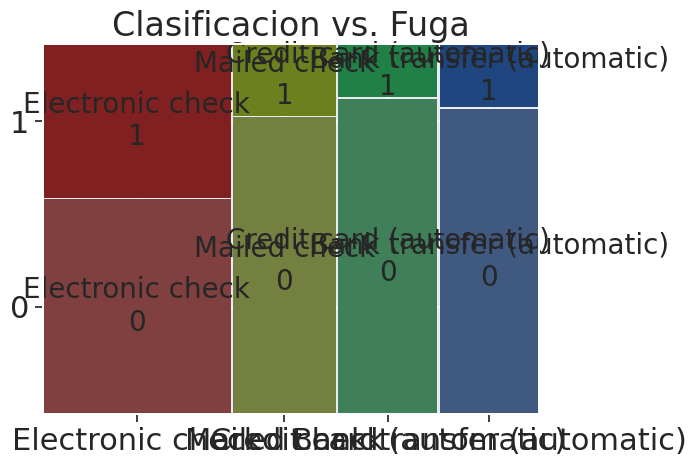

<Figure size 640x480 with 0 Axes>

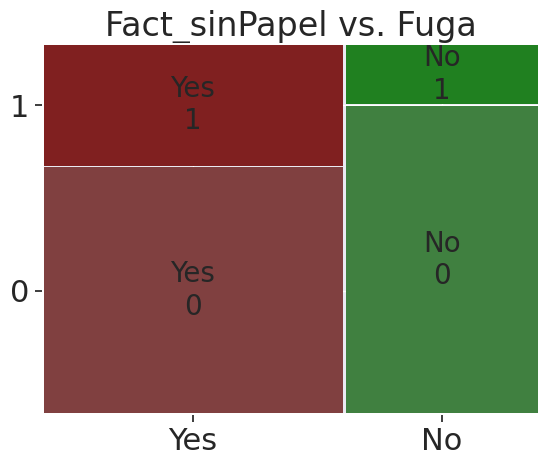

<Figure size 640x480 with 0 Axes>

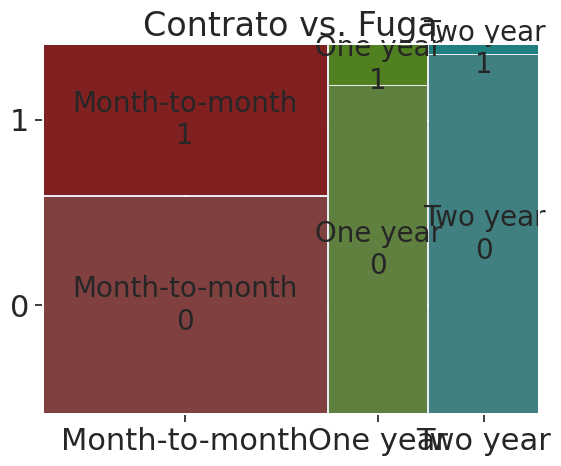

<Figure size 640x480 with 0 Axes>

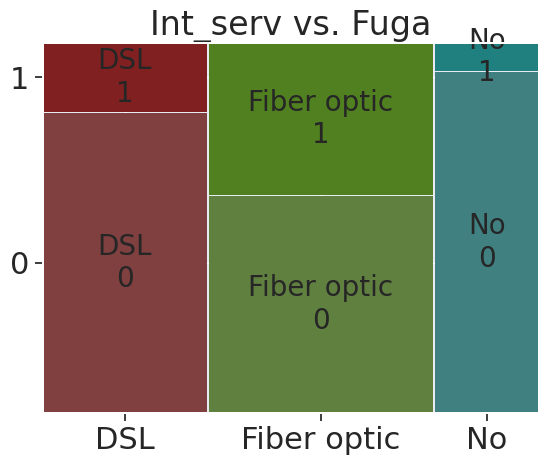

<Figure size 640x480 with 0 Axes>

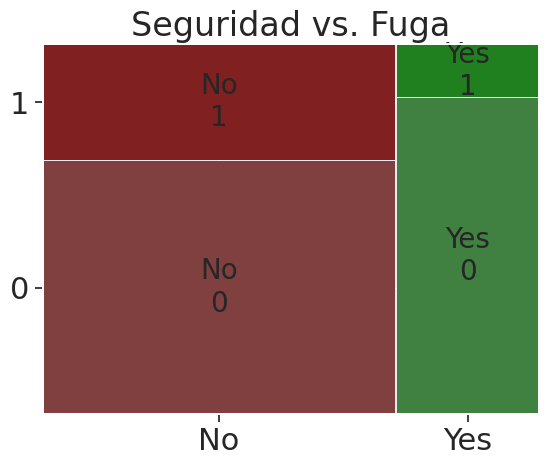

<Figure size 640x480 with 0 Axes>

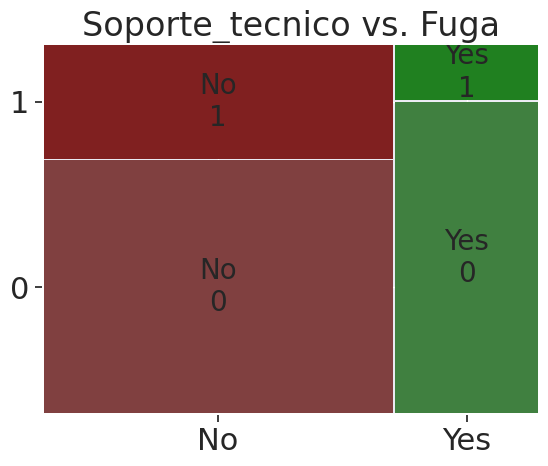

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

plt.clf()
#mosaic(pd.crosstab(FugaDep.MetodoPago, varObjBin))
mosaic(FugaDep,['MetodoPago','Fuga'],gap=0.005, title='Clasificacion vs. Fuga')
#sns.heatmap(pd.crosstab(FugaDep.MetodoPago, varObjBin))
plt.show()

plt.clf()
#mosaic(pd.crosstab(FugaDep.Fact_sinPapel, varObjBin))
mosaic(FugaDep,['Fact_sinPapel','Fuga'],gap=0.005, title='Fact_sinPapel vs. Fuga')
#sns.heatmap(pd.crosstab(FugaDep.Fact_sinPapel, varObjBin))
plt.show()

plt.clf()
#mosaic(pd.crosstab(FugaDep.Contrato, varObjBin))
mosaic(FugaDep,['Contrato','Fuga'],gap=0.005, title='Contrato vs. Fuga')
#sns.heatmap(pd.crosstab(FugaDep.Contrato, varObjBin))
plt.show()

plt.clf()
#mosaic(pd.crosstab(FugaDep.Contrato, varObjBin))
mosaic(FugaDep,['Int_serv','Fuga'],gap=0.005, title='Int_serv vs. Fuga')
#sns.heatmap(pd.crosstab(FugaDep.Contrato, varObjBin))
plt.show()


plt.clf()
#mosaic(pd.crosstab(FugaDep.Contrato, varObjBin))
mosaic(FugaDep,['Seguridad','Fuga'],gap=0.005, title='Seguridad vs. Fuga')
#sns.heatmap(pd.crosstab(FugaDep.Contrato, varObjBin))
plt.show()

plt.clf()
#mosaic(pd.crosstab(FugaDep.Contrato, varObjBin))
mosaic(FugaDep,['Soporte_tecnico','Fuga'],gap=0.005, title='Soporte_tecnico vs. Fuga')
#sns.heatmap(pd.crosstab(FugaDep.Contrato, varObjBin))
plt.show()

<Figure size 640x480 with 0 Axes>

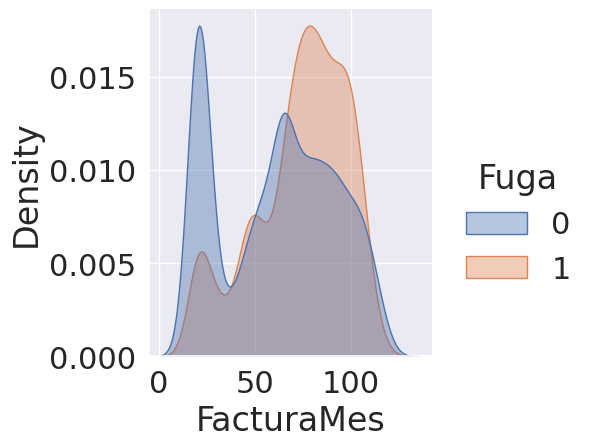

In [ ]:
plt.clf()
#sns.kdeplot(FugaDep,x="FacturaMes", hue="Fuga", fill=True, common_norm=False, alpha=0.4)
sns.displot(FugaDep, x="FacturaMes", hue="Fuga",kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='FacturaMes',color='Fuga',data=FugaDep,palette='viridis')
plt.show()

<Figure size 640x480 with 0 Axes>

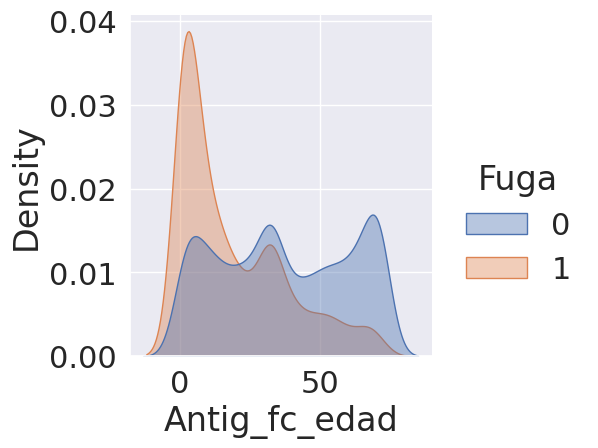

In [ ]:
plt.clf()
#sns.kdeplot(FugaDep,x="Antig_fc_edad", hue="Fuga", fill=True, common_norm=False, alpha=0.4)
sns.displot(FugaDep, x="Antig_fc_edad", hue="Fuga",kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='Antig_fc_edad',color='Fuga',data=FugaDep,palette='viridis')
plt.show()

<Figure size 640x480 with 0 Axes>

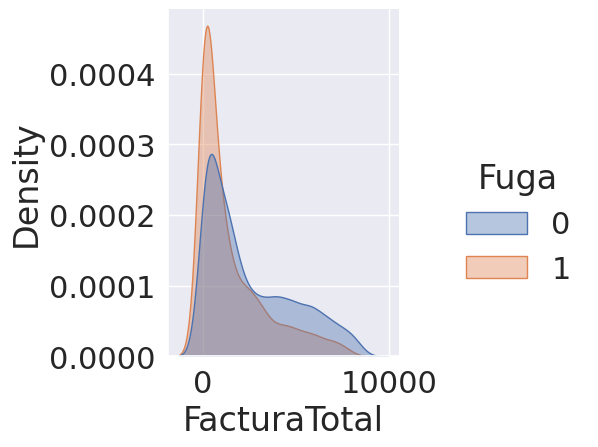

In [ ]:
plt.clf()
#sns.kdeplot(FugaDep,x="FacturaTotal", hue="Fuga", fill=True, common_norm=False, alpha=0.4)
sns.displot(FugaDep, x="FacturaTotal", hue="Fuga",kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='FacturaTotal',color='Fuga',data=FugaDep,palette='viridis')
plt.show()

<Figure size 640x480 with 0 Axes>

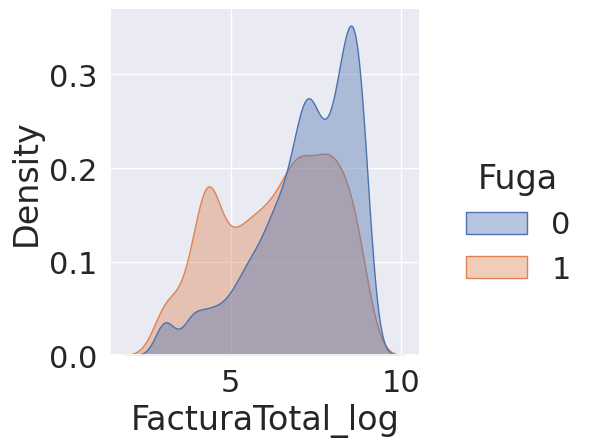

In [ ]:
plt.clf()
#sns.kdeplot(FugaDep,x="FacturaMes", hue="Fuga", fill=True, common_norm=False, alpha=0.4)
sns.displot(FugaDep, x="FacturaTotal_log", hue="Fuga",kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='FacturaMes',color='Fuga',data=FugaDep,palette='viridis')
plt.show()

En el caso de Factura Total, hay algo de solapamiento de las distribuciones de 0 y 1 pero no es del todo lo esperado (no sé si estaria bien asi)

TRANSFORMACIONES VAR CONTINUAS

In [ ]:
# Aplicar a las variables continuas la mejor transfromación según cramer frente a varObjBin
transf_cramer = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin, tipo='cramer'))
transf_cramer_names = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin,tipo='cramer', name=True))
transf_cramer.columns = transf_cramer_names.values
transf_cramer

,Antig_fc_edad_raiz4,FacturaMes_raiz4,FacturaTotal_raiz4,FacturaTotal_log_ident,aleatorio_cuarta,aleatorio2_exp
0,0.453181,1.124239,0.265868,0.286553,75.956762,26.784058
1,1.093683,1.124239,0.954213,2.944968,79.396659,2.557993
2,0.538767,1.052028,0.446353,1.102777,24.538932,21.085636
3,1.173068,0.953779,0.947935,2.928092,80.112252,5.177196
4,1.080424,1.159040,0.492783,1.319447,63.884633,14.092986
...,...,...,...,...,...,...
6348,1.319323,0.562165,0.887620,2.760287,120.297420,1.593330
6349,1.002485,1.230121,0.966838,2.978588,1.153944,24.784269
6350,1.319323,1.307526,1.343133,3.823309,14.833042,6.983100
6351,0.640610,1.178960,0.597708,1.772040,18.294678,1.862662


In [ ]:
imput_transf = imputDep.join(transf_cramer)

tablaCramer2 = pd.DataFrame(imput_transf.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])
px.bar(tablaCramer2,x=tablaCramer2.VCramer,title='Relaciones frente a Compra').update_yaxes(categoryorder="total ascending").show()


#PROBAR CON ANTIGUEDAD FC RAIZ 4 , FACTURA TOTAL RAIZ 4, FACTURA MES RAIZ 4


In [ ]:
imput_transf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Antig_fc_edad           6353 non-null   float64 
 1   FacturaMes              6353 non-null   float64 
 2   FacturaTotal            6353 non-null   float64 
 3   FacturaTotal_log        6353 non-null   float64 
 4   prop_missings           6353 non-null   category
 5   Genero                  6353 non-null   category
 6   Mayor65                 6353 non-null   category
 7   Conyuge                 6353 non-null   category
 8   PersCargo               6353 non-null   category
 9   Telf_serv               6353 non-null   category
 10  VariasLineas            6353 non-null   category
 11  Int_serv                6353 non-null   category
 12  Seguridad               6353 non-null   category
 13  CopiaSeguridad          6353 non-null   category
 14  Antivirus_disp          

Tendencia al 0

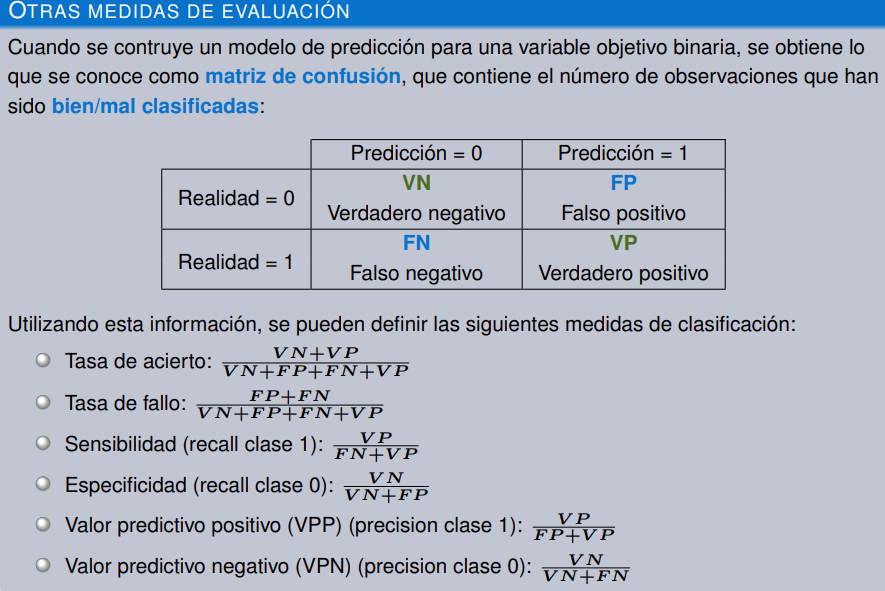

In [ ]:
imput = pd.concat([imput_transf,varObjBin], axis=1)
imput.Fuga.value_counts(normalize=True)

,proportion
Fuga,
0,0.734614
1,0.265386


TRAINING TEST

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Step 1: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(imput_transf, varObjBin, test_size=0.2, random_state=1234)

# Step 2: Check dimensions
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

# Step 3: Perform undersampling to balance the classes
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Step 4: Combine resampled training data back into a DataFrame
data_train_resampled = X_train_resampled.join(y_train_resampled.astype('int64'))
data_test = X_test.join(y_test.astype('int64'))
print('data_train_resampled dataset shape:', X_train_resampled.shape, y_train_resampled.shape)



Training dataset shape: (5082, 29) (5082,)
Testing dataset shape: (1271, 29) (1271,)
data_train_resampled dataset shape: (2694, 29) (2694,)


In [ ]:
# Training
print(y_train_resampled.value_counts(normalize=True))

# Test
y_test.value_counts(normalize=True)


Fuga
0    0.5
1    0.5
Name: proportion, dtype: float64


,proportion
Fuga,
0,0.733281
1,0.266719


Mantiene proporción



```
# Tiene formato de código
```

MODELO COMPLETO , sacando variables transformadas

In [ ]:
data_train = X_train.join(y_train.astype('int64'))
data_test = X_test.join(y_test.astype('int64'))


In [ ]:
data_train_resampled

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,Genero,Mayor65,Conyuge,PersCargo,Telf_serv,...,MetodoPago,aleatorio,aleatorio2,Antig_fc_edad_raiz4,FacturaMes_raiz4,FacturaTotal_raiz4,FacturaTotal_log_ident,aleatorio_cuarta,aleatorio2_exp,Fuga
64,1.000000,49.05,49.05,3.913023,0.000000,Male,0.0,No,No,Yes,...,Mailed check,0.975884,0.488223,0.453181,1.014621,0.340894,0.599123,1.349441e+02,5.365632,0
2895,17.000000,20.05,337.90,5.825705,0.000000,Female,0.0,No,No,Yes,...,Credit card (automatic),0.194565,0.233963,0.919691,0.499056,0.613323,1.834636,2.130147e-01,2.236501,0
4357,18.000000,40.20,711.95,6.569411,0.000000,Female,0.0,No,No,No,...,Mailed check,0.565684,0.984368,0.932925,0.932243,0.744515,2.315039,1.523288e+01,29.595441,0
2284,69.000000,107.20,7317.10,8.898106,4.761905,Male,0.0,Yes,No,Yes,...,Electronic check,0.479575,0.764860,1.305360,1.322653,1.341034,3.819278,7.868296e+00,13.903316,0
4651,2.000000,20.35,35.10,3.586293,0.000000,Female,0.0,No,No,Yes,...,Credit card (automatic),0.161037,0.185403,0.538767,0.518634,0.292530,0.388070,9.994233e-02,1.892283,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,11.000000,74.95,815.50,6.705027,0.000000,Male,0.0,No,No,Yes,...,Electronic check,0.723929,0.484193,0.824871,1.181836,0.770878,2.402641,4.086104e+01,5.291720,1
3397,1.000000,79.05,79.05,4.382651,0.000000,Male,0.0,No,No,Yes,...,Electronic check,0.884563,0.392837,0.453181,1.202644,0.404600,0.902484,9.108902e+01,3.864064,1
2168,32.380769,96.25,512.45,6.241153,4.761905,Female,0.0,No,No,Yes,...,Electronic check,0.918240,0.140613,1.080424,1.279922,0.683968,2.102998,1.057740e+02,1.621945,1
1182,32.380769,85.20,1553.90,7.349167,4.761905,Female,0.0,No,No,Yes,...,Electronic check,0.727137,0.497079,1.080424,1.231965,0.908199,2.818728,4.159011e+01,5.531694,1


In [ ]:
data_test

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,Genero,Mayor65,Conyuge,PersCargo,Telf_serv,...,MetodoPago,aleatorio,aleatorio2,Antig_fc_edad_raiz4,FacturaMes_raiz4,FacturaTotal_raiz4,FacturaTotal_log_ident,aleatorio_cuarta,aleatorio2_exp,Fuga
6161,60.000000,79.05,4663.40,8.447714,0.000000,Male,0.0,Yes,Yes,Yes,...,Credit card (automatic),0.891001,0.425565,1.260539,1.202644,1.197770,3.528344,9.377011e+01,4.324769,0
6198,49.000000,74.60,3720.35,8.221842,0.000000,Male,0.0,No,No,Yes,...,Bank transfer (automatic),0.005136,0.714793,1.198308,1.180008,1.131706,3.382440,9.905052e-08,11.702592,0
801,33.000000,54.65,1665.20,7.418301,0.000000,Male,0.0,No,No,Yes,...,Bank transfer (automatic),0.574074,0.862924,1.085552,1.057889,0.924230,2.863386,1.615699e+01,19.484874,0
1360,68.000000,54.10,3794.50,8.241571,4.761905,Male,0.0,Yes,No,No,...,Electronic check,0.932680,0.259071,1.300605,1.053870,1.137331,3.395185,1.125867e+02,2.438374,0
4402,46.000000,69.10,3255.35,8.088362,0.000000,Female,1.0,No,No,Yes,...,Credit card (automatic),0.871824,0.490134,1.179531,1.150098,1.094358,3.296218,8.595366e+01,5.401026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,37.000000,91.20,3247.55,8.085964,0.000000,Male,0.0,Yes,Yes,Yes,...,Credit card (automatic),0.358996,0.676707,1.117048,1.258684,1.093698,3.294669,2.470281e+00,10.264872,0
2197,32.000000,19.45,674.55,6.515527,4.761905,Male,0.0,Yes,Yes,Yes,...,Credit card (automatic),0.921402,0.516524,1.077234,0.451039,0.734265,2.280232,1.072389e+02,5.914565,0
5383,18.000000,78.55,1422.65,7.260979,0.000000,Male,1.0,Yes,No,Yes,...,Electronic check,0.769083,0.908315,0.932925,1.200164,0.888135,2.761763,5.205069e+01,22.779610,1
1830,32.380769,25.05,125.50,4.840242,4.761905,Female,0.0,Yes,Yes,No,...,Mailed check,0.386562,0.085448,1.080424,0.695552,0.466554,1.198068,3.321112e+00,1.341467,0


In [ ]:
print(data_train_resampled.columns.tolist())


['Antig_fc_edad', 'FacturaMes', 'FacturaTotal', 'FacturaTotal_log', 'prop_missings', 'Genero', 'Mayor65', 'Conyuge', 'PersCargo', 'Telf_serv', 'VariasLineas', 'Int_serv', 'Seguridad', 'CopiaSeguridad', 'Antivirus_disp', 'Soporte_tecnico', 'TV_streaming', 'Peliculas', 'Contrato', 'Fact_sinPapel', 'MetodoPago', 'aleatorio', 'aleatorio2', 'Antig_fc_edad_raiz4', 'FacturaMes_raiz4', 'FacturaTotal_raiz4', 'FacturaTotal_log_ident', 'aleatorio_cuarta', 'aleatorio2_exp', 'Fuga']


In [ ]:

formC=ols_formula(data_train_resampled.drop(['Antig_fc_edad_raiz4', 'FacturaMes_raiz4', 'FacturaTotal_raiz4' ,'aleatorio_cuarta', 'aleatorio2_exp', 'FacturaTotal_log_ident'], axis=1),'Fuga')
formC


'Fuga ~ Antig_fc_edad + FacturaMes + FacturaTotal + FacturaTotal_log + prop_missings + Genero + Mayor65 + Conyuge + PersCargo + Telf_serv + VariasLineas + Int_serv + Seguridad + CopiaSeguridad + Antivirus_disp + Soporte_tecnico + TV_streaming + Peliculas + Contrato + Fact_sinPapel + MetodoPago + aleatorio + aleatorio2'

In [ ]:
from statsmodels.formula.api import logit

# Ajusto regresión de ejemplo, sin las trasnsformaciones, solo al modelo depurado.
modeloCompleto = logit(formC,data=data_train_resampled).fit(method='bfgs')
modeloCompleto.summary()


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:1291: OptimizeWarning:

Maximum number of iterations has been exceeded.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: 0.475174
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 37


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2663
Method:                           MLE   Df Model:                           30
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3145
Time:                        09:46:12   Log-Likelihood:                -1280.1
converged:                      False   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                6.410e-228
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.6949      0.443      3.826      0.000       0.827       2.563
prop_missings[T.4.761904761904762]       -0.0630      0.111     -0.566      0.571      -0.281       0.155
prop_missings[T.9.523809523809524]       -0.5815      0.195     -2.988      0.003      -0.963      -0.200
prop_missings[T.14.285714285714285]       0.0207      0.592      0.035      0.972      -1.139       1.181
prop_missings[T.19.047619047619047]      -0.0070      6.641     -0.001      0.999     -13.024      13.010
Genero[T.Male]                            0.0227      0.099      0.230      0.818      -0.171       0.216
Mayor65[T.1.0]                            0.1878      0.137      1.372      0.170      -0.081       0.456
Conyuge[T.Yes]                            0.0429      0.118      0.364      0.716      -0.188       0.274
PersCargo[T.Yes]                         -0.0261      0.131     -0.199      0.842      -0.283       0.231
Telf_serv[T.Yes]                         -0.3448      0.226     -1.526      0.127      -0.788       0.098
VariasLineas[T.Yes]                       0.3649      0.128      2.849      0.004       0.114       0.616
Int_serv[T.Fiber optic]                   0.6912      0.188      3.674      0.000       0.322       1.060
Int_serv[T.No]                           -0.7287      0.234     -3.120      0.002      -1.186      -0.271
Seguridad[T.Yes]                         -0.4018      0.129     -3.106      0.002      -0.655      -0.148
CopiaSeguridad[T.Yes]                    -0.2678      0.121     -2.213      0.027      -0.505      -0.031
Antivirus_disp[T.Yes]                     0.1535      0.124      1.237      0.216      -0.090       0.397
Soporte_tecnico[T.Yes]                   -0.3310      0.128     -2.588      0.010      -0.582      -0.080
TV_streaming[T.Yes]                       0.1692      0.140      1.208      0.227      -0.105       0.444
Peliculas[T.Yes]                          0.1154      0.138      0.837      0.403      -0.155       0.386
Contrato[T.One year]                     -0.8657      0.150     -5.758      0.000      -1.160      -0.571
Contrato[T.Two year]                     -1.8741      0.237     -7.907      0.000      -2.339      -1.410
Fact_sinPapel[T.Yes]                      0.6692      0.110      6.099      0.000       0.454       0.884
MetodoPago[T.Credit card (automatic)]    -0.1487      0.168     -0.886      0.375      -0.478       0.180
MetodoPago[T.Electronic check]            0.3409      0.142      2.408      0.016       0.063       0.618
MetodoPago[T.Mailed check]                0.0614      0.172      0.357      0.721      -0.275       0.398
Antig_fc_edad                            -0.0083      0.007     -1.240      0.215      -0.021       0.005
FacturaMes                                0.0135      0.006      2.303      0.021       0.002       0.025
FacturaTotal                           2.833e-05   7.06e-05  

In [ ]:
import statsmodels.api as sm
import patsy

# Generamos las matrices de diseño según la fórmula de modelo completo
y_tr, X_tr = patsy.dmatrices(formC, data_train_resampled, return_type='dataframe')

# Generamos las matrices de diseño según la fórmula de modelo completo para test
y_tst, X_tst = patsy.dmatrices(formC, data_test, return_type='dataframe')


# Ahora podemos aplicar la función "oficial" de statmodels Logit (con formato y,X)
# model=sm.Logit(y,X).fit()
# model.summary()


In [ ]:
!pip install relativeImp

In [ ]:
from relativeImp import relativeImp

# Nombres de predictores (en modo dummy) donde quitamos la constante
names=X_tr.columns.tolist()[1:]

# Calculamos importancia relativa
df_results = relativeImp(X_tr.join(y_tr), outcomeName = 'Fuga', driverNames = names)

# Ordenamos valores
df_results.sort_values(by='normRelaImpt', ascending=False)

,driver,rawRelaImpt,normRelaImpt
19,Contrato[T.Two year],0.044600,12.053646
10,Int_serv[T.Fiber optic],0.037994,10.268452
27,FacturaTotal_log,0.033502,9.054376
24,Antig_fc_edad,0.033281,8.994604
11,Int_serv[T.No],0.027721,7.491850
18,Contrato[T.One year],0.025426,6.871815
20,Fact_sinPapel[T.Yes],0.022753,6.149335
26,FacturaTotal,0.020041,5.416239
25,FacturaMes,0.019761,5.340611
22,MetodoPago[T.Electronic check],0.017984,4.860419


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Definición de modelo
modelo = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)

# Arreglar y para que le guste a sklearn...numeric
y_tr_ = y_tr.Fuga.ravel()

# Ajuste de modelo
modelLog = modelo.fit(X_tr,y_tr_)

# Accuracy del modelo en training
acc = modelLog.score(X_tr,y_tr_)
print(acc)

# Predicciones en test
y_pred = modelLog.predict(X_tst)

# Matriz de confusion de clasificación
print(metrics.confusion_matrix(y_tst,y_pred))

# Reporte de clasificación
print(metrics.classification_report(y_tst,y_pred))

# Extraemos el Area bajo la curva ROC
metrics.roc_auc_score(y_tr, modelLog.predict_proba(X_tr)[:, 1])


<ipython-input-69-13351021b11f>:8: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



0.7798812175204157
[[669 263]
 [ 56 283]]
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81       932
         1.0       0.52      0.83      0.64       339

    accuracy                           0.75      1271
   macro avg       0.72      0.78      0.72      1271
weighted avg       0.81      0.75      0.76      1271



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



np.float64(0.8556334321533899)

In [ ]:
# regresión con fórmula completa y transformaciones
formC_transf = ols_formula(data_train_resampled,'Fuga')

formC_transf

'Fuga ~ Antig_fc_edad + FacturaMes + FacturaTotal + FacturaTotal_log + prop_missings + Genero + Mayor65 + Conyuge + PersCargo + Telf_serv + VariasLineas + Int_serv + Seguridad + CopiaSeguridad + Antivirus_disp + Soporte_tecnico + TV_streaming + Peliculas + Contrato + Fact_sinPapel + MetodoPago + aleatorio + aleatorio2 + Antig_fc_edad_raiz4 + FacturaMes_raiz4 + FacturaTotal_raiz4 + FacturaTotal_log_ident + aleatorio_cuarta + aleatorio2_exp'

In [ ]:
modeloCompleto_transf = logit(formC_transf,data=data_train_resampled).fit()
modeloCompleto_transf.summary()

         Current function value: 0.471154
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2658
Method:                           MLE   Df Model:                           35
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3203
Time:                        09:46:18   Log-Likelihood:                -1269.3
converged:                      False   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                1.467e-228
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.8633   9.18e+05   9.41e-07      1.000    -1.8e+06     1.8e+06
prop_missings[T.4.761904761904762]       -0.0672      0.114     -0.589      0.556      -0.291       0.156
prop_missings[T.9.523809523809524]       -0.6093      0.201     -3.025      0.002      -1.004      -0.215
prop_missings[T.14.285714285714285]      -0.0107      0.601     -0.018      0.986      -1.188       1.167
prop_missings[T.19.047619047619047]     -15.9879   1.32e+04     -0.001      0.999    -2.6e+04    2.59e+04
Genero[T.Male]                           -0.0285      0.099     -0.287      0.774      -0.223       0.166
Mayor65[T.1.0]                            0.2184      0.138      1.588      0.112      -0.051       0.488
Conyuge[T.Yes]                            0.0340      0.118      0.288      0.774      -0.198       0.266
PersCargo[T.Yes]                         -0.0646      0.132     -0.490      0.624      -0.323       0.194
Telf_serv[T.Yes]                         -0.3891      0.231     -1.682      0.093      -0.843       0.064
VariasLineas[T.Yes]                       0.4022      0.129      3.115      0.002       0.149       0.655
Int_serv[T.Fiber optic]                   0.9140      0.213      4.299      0.000       0.497       1.331
Int_serv[T.No]                           -1.2029      0.363     -3.318      0.001      -1.913      -0.492
Seguridad[T.Yes]                         -0.3001      0.131     -2.296      0.022      -0.556      -0.044
CopiaSeguridad[T.Yes]                    -0.2167      0.122     -1.771      0.077      -0.457       0.023
Antivirus_disp[T.Yes]                     0.2524      0.125      2.018      0.044       0.007       0.498
Soporte_tecnico[T.Yes]                   -0.3528      0.129     -2.731      0.006      -0.606      -0.100
TV_streaming[T.Yes]                       0.2732      0.145      1.885      0.059      -0.011       0.557
Peliculas[T.Yes]                          0.1582      0.142      1.111      0.267      -0.121       0.437
Contrato[T.One year]                     -0.7957      0.152     -5.240      0.000      -1.093      -0.498
Contrato[T.Two year]                     -1.5493      0.232     -6.669      0.000      -2.005      -1.094
Fact_sinPapel[T.Yes]                      0.6619      0.111      5.967      0.000       0.445       0.879
MetodoPago[T.Credit card (automatic)]    -0.3870      0.168     -2.301      0.021      -0.717      -0.057
MetodoPago[T.Electronic check]            0.1598      0.142      1.123      0.262      -0.119       0.439
MetodoPago[T.Mailed check]               -0.1658      0.174     -0.951      0.342      -0.508       0.176
Antig_fc_edad                            -0.0219      0.013     -1.657      0.097      -0.048       0.004
FacturaMes                                0.0060      0.012      0.505      0.614      -0.017       0.029
FacturaTotal                          -2.374e-05      0.000  

In [ ]:
#separar Train-Test automáticamente dentro de la función y generar reporte

#tr_tst_eval_log(formC_transf,data =data_train)

MODELO MANUAL AGREGANDO UNA A UNA

In [ ]:
form1 = 'Fuga ~ Contrato + Antig_fc_edad'

# Ajustar modelo 1
modelo1 = logit(form1,data=data_train_resampled).fit()
modelo1.summary()

Optimization terminated successfully.
         Current function value: 0.560908
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2690
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.1908
Time:                        09:46:18   Log-Likelihood:                -1511.1
converged:                       True   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                4.074e-154
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0002      0.069     14.523      0.000       0.865       1.135
Contrato[T.One year]    -1.3800      0.130    -10.588      0.000      -1.636      -1.125
Contrato[T.Two year]    -2.4811      0.198    -12.509      0.000      -2.870      -2.092
Antig_fc_edad           -0.0177      0.002     -7.331      0.000      -0.022      -0.013
========================================================================================
"""

In [ ]:
#tr_tst_eval_log(form1,data =data_train)

In [ ]:
#form22 = 'Fuga ~ Contrato + Antig_fc_edad_raiz4
form2 = 'Fuga ~ Contrato + Antig_fc_edad_raiz4+ Int_serv + FacturaTotal_log'

# Ajustar modelo 2
modelo2 = logit(form2,data=data_train_resampled).fit()
modelo2.summary()


Optimization terminated successfully.
         Current function value: 0.501102
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2687
Method:                           MLE   Df Model:                            6
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.2771
Time:                        09:46:18   Log-Likelihood:                -1350.0
converged:                       True   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                2.740e-220
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.9724      0.267     11.115      0.000       2.448       3.497
Contrato[T.One year]       -0.9095      0.139     -6.544      0.000      -1.182      -0.637
Contrato[T.Two year]       -1.8140      0.204     -8.896      0.000      -2.214      -1.414
Int_serv[T.Fiber optic]     1.4132      0.120     11.816      0.000       1.179       1.648
Int_serv[T.No]             -1.4006      0.186     -7.522      0.000      -1.766      -1.036
Antig_fc_edad_raiz4        -0.8642      0.451     -1.916      0.055      -1.748       0.020
FacturaTotal_log           -0.3496      0.085     -4.130      0.000      -0.515      -0.184
===========================================================================================
"""

In [ ]:
#tr_tst_eval_log(form2,data =data_train)

In [ ]:
form3 = 'Fuga ~ Contrato+ Antig_fc_edad_raiz4 + Int_serv +FacturaTotal_log + Fact_sinPapel + Soporte_tecnico + Seguridad'


modelo3 = logit(form3,data=data_train_resampled).fit()
modelo3.summary()

Optimization terminated successfully.
         Current function value: 0.488274
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2684
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.2956
Time:                        09:46:18   Log-Likelihood:                -1315.4
converged:                       True   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                6.827e-232
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.6142      0.273      9.583      0.000       2.080       3.149
Contrato[T.One year]       -0.7965      0.142     -5.602      0.000      -1.075      -0.518
Contrato[T.Two year]       -1.5922      0.209     -7.606      0.000      -2.003      -1.182
Int_serv[T.Fiber optic]     1.1836      0.125      9.433      0.000       0.938       1.430
Int_serv[T.No]             -1.4435      0.190     -7.583      0.000      -1.817      -1.070
Fact_sinPapel[T.Yes]        0.7292      0.108      6.783      0.000       0.518       0.940
Soporte_tecnico[T.Yes]     -0.3315      0.120     -2.773      0.006      -0.566      -0.097
Seguridad[T.Yes]           -0.3666      0.121     -3.029      0.002      -0.604      -0.129
Antig_fc_edad_raiz4        -0.9411      0.462     -2.035      0.042      -1.847      -0.035
FacturaTotal_log           -0.3182      0.088     -3.614      0.000      -0.491      -0.146
===========================================================================================
"""

In [ ]:
#tr_tst_eval_log(form3,data =data_train)

In [ ]:
form4 = 'Fuga ~ Contrato+ Antig_fc_edad_raiz4+Int_serv+FacturaTotal_log+FacturaMes_raiz4+Fact_sinPapel+Soporte_tecnico+Seguridad+Mayor65'

# Ajustar modelo
modelo4 = logit(form4,data=data_train_resampled).fit()
modelo4.summary()

Optimization terminated successfully.
         Current function value: 0.485893
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.2990
Time:                        09:46:18   Log-Likelihood:                -1309.0
converged:                       True   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                1.445e-232
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.6678      0.438      3.807      0.000       0.809       2.527
Contrato[T.One year]       -0.7760      0.143     -5.441      0.000      -1.055      -0.496
Contrato[T.Two year]       -1.5596      0.210     -7.434      0.000      -1.971      -1.148
Int_serv[T.Fiber optic]     0.9673      0.143      6.760      0.000       0.687       1.248
Int_serv[T.No]             -0.9699      0.249     -3.898      0.000      -1.458      -0.482
Fact_sinPapel[T.Yes]        0.7056      0.108      6.538      0.000       0.494       0.917
Soporte_tecnico[T.Yes]     -0.3517      0.121     -2.912      0.004      -0.589      -0.115
Seguridad[T.Yes]           -0.3774      0.122     -3.102      0.002      -0.616      -0.139
Mayor65[T.1.0]              0.3035      0.130      2.329      0.020       0.048       0.559
Antig_fc_edad_raiz4        -0.5988      0.489     -1.225      0.221      -1.557       0.360
FacturaTotal_log           -0.4249      0.097     -4.374      0.000      -0.615      -0.235
FacturaMes_raiz4            1.2615      0.459      2.748      0.006       0.362       2.161
===========================================================================================
"""

In [ ]:
#tr_tst_eval_log(form4,data =data_train)

In [ ]:
form5 = 'Fuga ~ Contrato+Int_serv+FacturaTotal_log+Fact_sinPapel+Soporte_tecnico+Seguridad+	Mayor65+TV_streaming+Peliculas' #+MetodoPago

# Ajustar modelo
modelo5 = logit(form5,data=data_train_resampled).fit()
modelo5.summary()


Optimization terminated successfully.
         Current function value: 0.482661
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3037
Time:                        09:46:19   Log-Likelihood:                -1300.3
converged:                       True   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                2.563e-236
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0952      0.274     11.307      0.000       2.559       3.632
Contrato[T.One year]       -0.8580      0.144     -5.971      0.000      -1.140      -0.576
Contrato[T.Two year]       -1.6602      0.210     -7.923      0.000      -2.071      -1.249
Int_serv[T.Fiber optic]     1.1659      0.121      9.633      0.000       0.929       1.403
Int_serv[T.No]             -1.4520      0.185     -7.837      0.000      -1.815      -1.089
Fact_sinPapel[T.Yes]        0.6735      0.109      6.201      0.000       0.461       0.886
Soporte_tecnico[T.Yes]     -0.3361      0.121     -2.785      0.005      -0.573      -0.100
Seguridad[T.Yes]           -0.2956      0.122     -2.429      0.015      -0.534      -0.057
Mayor65[T.1.0]              0.2926      0.130      2.246      0.025       0.037       0.548
TV_streaming[T.Yes]         0.4286      0.123      3.487      0.000       0.188       0.669
Peliculas[T.Yes]            0.3209      0.121      2.646      0.008       0.083       0.559
FacturaTotal_log           -0.5673      0.046    -12.278      0.000      -0.658      -0.477
===========================================================================================
"""

In [ ]:
#podemos probar otras opciones...

In [ ]:
# Creamos lista de fórmulas
list_form = [formC,formC_transf,form1,form2,form3,form4,form5]
#list_form


# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_log(x,data_train_resampled, seed=2023),list_form))


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to 

Modelo: Fuga ~ Antig_fc_edad + FacturaMes + FacturaTotal + FacturaTotal_log + prop_missings + Genero + Mayor65 + Conyuge + PersCargo + Telf_serv + VariasLineas + Int_serv + Seguridad + CopiaSeguridad + Antivirus_disp + Soporte_tecnico + TV_streaming + Peliculas + Contrato + Fact_sinPapel + MetodoPago + aleatorio + aleatorio2
AUC: 0.847 (0.014)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Modelo: Fuga ~ Antig_fc_edad + FacturaMes + FacturaTotal + FacturaTotal_log + prop_missings + Genero + Mayor65 + Conyuge + PersCargo + Telf_serv + VariasLineas + Int_serv + Seguridad + CopiaSeguridad + Antivirus_disp + Soporte_tecnico + TV_streaming + Peliculas + Contrato + Fact_sinPapel + MetodoPago + aleatorio + aleatorio2 + Antig_fc_edad_raiz4 + FacturaMes_raiz4 + FacturaTotal_raiz4 + FacturaTotal_log_ident + aleatorio_cuarta + aleatorio2_exp
AUC: 0.848 (0.014)
Modelo: Fuga ~ Contrato + Antig_fc_edad
AUC: 0.778 (0.016)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Fuga ~ Contrato + Antig_fc_edad_raiz4+ Int_serv + FacturaTotal_log
AUC: 0.832 (0.015)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Fuga ~ Contrato+ Antig_fc_edad_raiz4 + Int_serv +FacturaTotal_log + Fact_sinPapel + Soporte_tecnico + Seguridad
AUC: 0.841 (0.013)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Fuga ~ Contrato+ Antig_fc_edad_raiz4+Int_serv+FacturaTotal_log+FacturaMes_raiz4+Fact_sinPapel+Soporte_tecnico+Seguridad+Mayor65
AUC: 0.842 (0.013)


<string>:295: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Modelo: Fuga ~ Contrato+Int_serv+FacturaTotal_log+Fact_sinPapel+Soporte_tecnico+Seguridad+	Mayor65+TV_streaming+Peliculas
AUC: 0.845 (0.013)


<ipython-input-84-75b44cae46b2>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




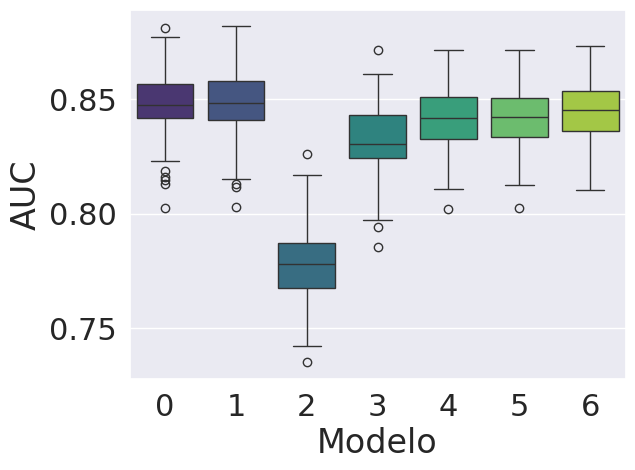

In [ ]:
# Transponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','AUC']
results.head()

# Boxplot paralelo para comparar
plt.clf()
sns.boxplot(x='Modelo',y='AUC',data=results,palette='viridis')
plt.show()


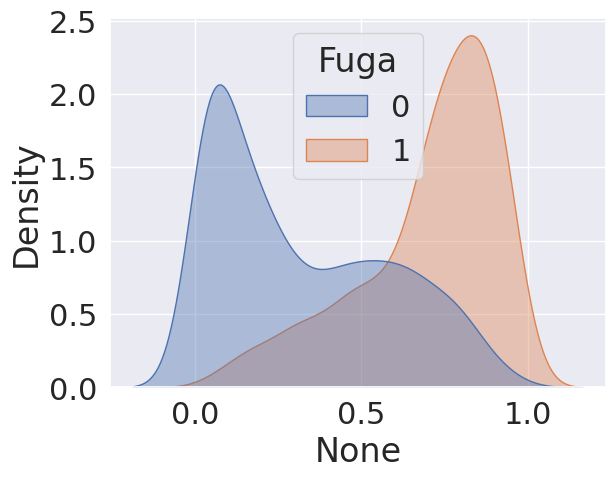

In [ ]:
y_pred = modelo5.predict(X_test)

#sns.histplot(x=y_pred, hue=y_test)
#px.histogram(x=y_pred, color=y_test).show()
#gráfico de las probabilidades obtenidas
plt.clf()
sns.kdeplot(x=y_pred, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()



In [ ]:
y_pred.describe()

,0
count,1271.000000
mean,0.421460
std,0.301357
min,0.013498
25%,0.123765
50%,0.409029
75%,0.700091
max,0.971118


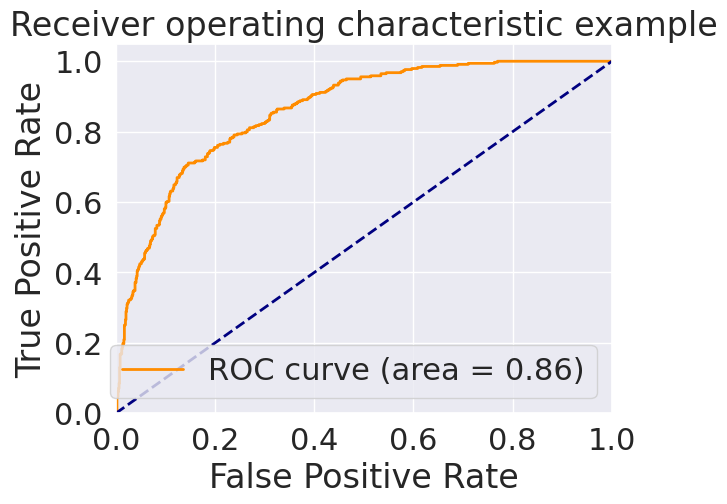

In [ ]:
def roc_grafico(test,pred):
    fpr, tpr, thresholds = metrics.roc_curve(test,pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

roc_grafico(y_test,y_pred)


In [ ]:
corte =cutoff_youden(y_test,y_pred)
corte


np.float64(0.6521552360116286)

In [ ]:
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3037
Time:                        09:48:04   Log-Likelihood:                -1300.3
converged:                       True   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                2.563e-236
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0952      0.274     11.307      0.000       2.559       3.632
Contrato[T.One year]       -0.8580      0.144     -5.971      0.000      -1.140      -0.576
Contrato[T.Two year]       -1.6602      0.210     -7.923      0.000      -2.071      -1.249
Int_serv[T.Fiber optic]     1.1659      0.121      9.633      0.000       0.929       1.403
Int_serv[T.No]             -1.4520      0.185     -7.837      0.000      -1.815      -1.089
Fact_sinPapel[T.Yes]        0.6735      0.109      6.201      0.000       0.461       0.886
Soporte_tecnico[T.Yes]     -0.3361      0.121     -2.785      0.005      -0.573      -0.100
Seguridad[T.Yes]           -0.2956      0.122     -2.429      0.015      -0.534      -0.057
Mayor65[T.1.0]              0.2926      0.130      2.246      0.025       0.037       0.548
TV_streaming[T.Yes]         0.4286      0.123      3.487      0.000       0.188       0.669
Peliculas[T.Yes]            0.3209      0.121      2.646      0.008       0.083       0.559
FacturaTotal_log           -0.5673      0.046    -12.278      0.000      -0.658      -0.477
===========================================================================================
"""

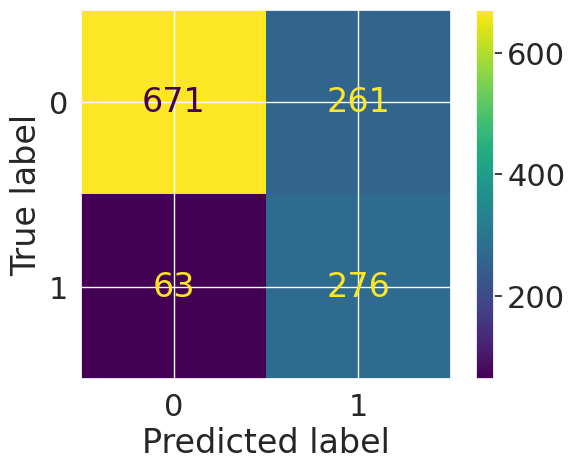

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo5.predict(X_test)
cm = confusion_matrix(y_test, round(y_pred))

cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display
plt.show()

In [ ]:
# Reporte de clasificación
print(metrics.classification_report(y_test,round(y_pred)))


              precision    recall  f1-score   support

           0       0.91      0.72      0.81       932
           1       0.51      0.81      0.63       339

    accuracy                           0.75      1271
   macro avg       0.71      0.77      0.72      1271
weighted avg       0.81      0.75      0.76      1271



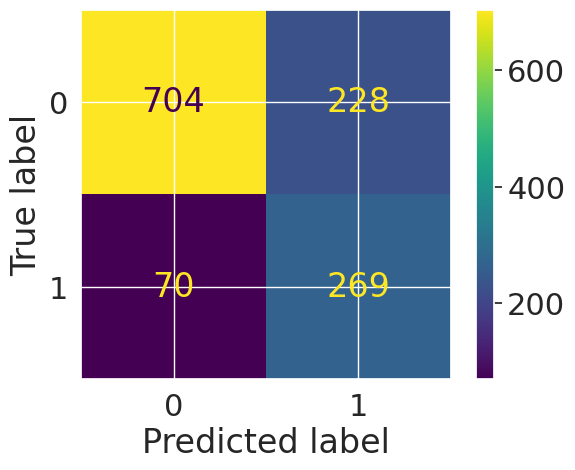

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo5.predict(X_test)
y_clas =  y_pred.map(lambda x: 1 if x > 0.55 else 0)

cm = confusion_matrix(y_test, y_clas)

cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display
plt.show(cm_display)

Interpretación de parámetros del modelo logístico

In [ ]:
varObjBin

,Fuga
0,0
1,0
2,1
3,0
4,1
...,...
6348,0
6349,0
6350,0
6351,1


In [ ]:
imputDep

,Antig_fc_edad,FacturaMes,FacturaTotal,FacturaTotal_log,prop_missings,Genero,Mayor65,Conyuge,PersCargo,Telf_serv,...,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,aleatorio,aleatorio2
0,1.000000,64.678369,29.85,3.429137,9.523810,Female,0.0,Yes,No,No,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.845289,0.955367
1,34.000000,64.678369,1889.50,7.544597,4.761905,Male,0.0,No,No,Yes,...,No,Yes,No,No,No,One year,No,Mailed check,0.854700,0.272986
2,2.000000,53.850000,108.15,4.692723,0.000000,Male,0.0,No,No,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.637290,0.885864
3,45.000000,42.300000,1840.75,7.518471,9.523810,Male,0.0,No,No,No,...,No,Yes,Yes,No,No,One year,No,Electronic check,0.856620,0.477836
4,32.380769,70.700000,151.65,5.028148,4.761905,Female,0.0,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.809495,0.768797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,72.000000,21.150000,1419.40,7.258694,0.000000,Female,0.0,No,No,Yes,...,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0.948254,0.135441
6349,24.000000,84.800000,1990.50,7.596643,0.000000,Male,0.0,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.296800,0.932821
6350,72.000000,103.200000,7362.90,8.904345,4.761905,Male,0.0,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0.561935,0.564777
6351,4.000000,74.400000,306.60,5.728800,4.761905,Male,1.0,Yes,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.592185,0.180819


In [ ]:
# Ajustamos el modelo a datos completos para obtener estimadores más fiables
FugaDep = pd.concat([imputDep,varObjBin.astype('int64')], axis=1)

modeloF = logit(form5,data=FugaDep).fit()
modeloF.summary()


Optimization terminated successfully.
         Current function value: 0.412354
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 6353
Model:                          Logit   Df Residuals:                     6341
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.2873
Time:                        09:48:05   Log-Likelihood:                -2619.7
converged:                       True   LL-Null:                       -3675.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.2722      0.182     12.495      0.000       1.916       2.629
Contrato[T.One year]       -0.8017      0.111     -7.254      0.000      -1.018      -0.585
Contrato[T.Two year]       -1.8368      0.184     -9.991      0.000      -2.197      -1.476
Int_serv[T.Fiber optic]     1.2246      0.088     13.991      0.000       1.053       1.396
Int_serv[T.No]             -1.4733      0.140    -10.554      0.000      -1.747      -1.200
Fact_sinPapel[T.Yes]        0.4364      0.079      5.506      0.000       0.281       0.592
Soporte_tecnico[T.Yes]     -0.3202      0.089     -3.596      0.000      -0.495      -0.146
Seguridad[T.Yes]           -0.3582      0.089     -4.026      0.000      -0.533      -0.184
Mayor65[T.1.0]              0.3067      0.088      3.470      0.001       0.133       0.480
TV_streaming[T.Yes]         0.4818      0.085      5.667      0.000       0.315       0.648
Peliculas[T.Yes]            0.4154      0.084      4.939      0.000       0.251       0.580
FacturaTotal_log           -0.5870      0.031    -18.739      0.000      -0.648      -0.526
===========================================================================================
"""

In [ ]:
np.exp(modeloF.params)


,0
Intercept,9.700702
Contrato[T.One year],0.448577
Contrato[T.Two year],0.159321
Int_serv[T.Fiber optic],3.402876
Int_serv[T.No],0.229177
Fact_sinPapel[T.Yes],1.547104
Soporte_tecnico[T.Yes],0.725999
Seguridad[T.Yes],0.698904
Mayor65[T.1.0],1.358985
TV_streaming[T.Yes],1.618971


In [ ]:
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Fuga   No. Observations:                 2694
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.3037
Time:                        09:48:05   Log-Likelihood:                -1300.3
converged:                       True   LL-Null:                       -1867.3
Covariance Type:            nonrobust   LLR p-value:                2.563e-236
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0952      0.274     11.307      0.000       2.559       3.632
Contrato[T.One year]       -0.8580      0.144     -5.971      0.000      -1.140      -0.576
Contrato[T.Two year]       -1.6602      0.210     -7.923      0.000      -2.071      -1.249
Int_serv[T.Fiber optic]     1.1659      0.121      9.633      0.000       0.929       1.403
Int_serv[T.No]             -1.4520      0.185     -7.837      0.000      -1.815      -1.089
Fact_sinPapel[T.Yes]        0.6735      0.109      6.201      0.000       0.461       0.886
Soporte_tecnico[T.Yes]     -0.3361      0.121     -2.785      0.005      -0.573      -0.100
Seguridad[T.Yes]           -0.2956      0.122     -2.429      0.015      -0.534      -0.057
Mayor65[T.1.0]              0.2926      0.130      2.246      0.025       0.037       0.548
TV_streaming[T.Yes]         0.4286      0.123      3.487      0.000       0.188       0.669
Peliculas[T.Yes]            0.3209      0.121      2.646      0.008       0.083       0.559
FacturaTotal_log           -0.5673      0.046    -12.278      0.000      -0.658      -0.477
===========================================================================================
"""

#### Resumen


*  **Dataset**: imput_media_moda
*  Usé el método ***undersampling*** para el conjunto de entrenamiento porque la distribución de la variable objetiva no está balanceada.

*   Transformé la variable ***FacturaTotal*** a ***FacturaTotal_log***.
*  **Modelo final**:

    *form5 = 'Fuga ~ Contrato + Int_serv + FacturaTotal_log + Fact_sinPapel + Soporte_tecnico + Seguridad + Mayor65 + TV_streaming + Peliculas'*


*  **Resultados**:

---



    Pseudo R-squared (modelo 5): 0.3037

    ROC curve: 0.86

    Corte (threshold): 0.5

    Accuracy: 0.75

    Precision clase 0: 0.91, Recall clase 0: 0.72, F1-score clase 0: 0.81

    Precision clase 1: 0.51, Recall clase 1: 0.81, F1-score clase 1: 0.63

    F1-score promedio ponderado: 0.76

    Pseudo R-squared (modelo final ajustado a datos completos): 0.2873